##Loading necessary libraries

In [105]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder, MinMaxScaler

#Loading the data

In [106]:
train_df=pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv")

In [107]:
traindf=train_df.drop(columns='Id')

In [108]:
traindf.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

#Exploratory Data Analysis Of The Dataset

In [109]:
traindf.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [110]:
traindf.shape

(1460, 80)

In [111]:
traindf.count()

MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 80, dtype: int64

In [112]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [113]:
traindf["YrsOld"]=traindf["YrSold"]-traindf["YearBuilt"]
traindf["TotalBathroom"]=traindf["FullBath"] + (traindf["HalfBath"]/2) + traindf["BsmtFullBath"] + (traindf["BsmtHalfBath"]/2)
traindf["TotalPorchArea"]=traindf["OpenPorchSF"]+traindf["EnclosedPorch"]+traindf["3SsnPorch"]+traindf["ScreenPorch"]

In [114]:
numeric_features = traindf.select_dtypes(include=['int64', 'float64']).columns
categorical_features = traindf.select_dtypes(include=['object', 'category','O']).columns

In [115]:
numeric_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'YrsOld', 'TotalBathroom',
       'TotalPorchArea'],
      dtype='object')

In [116]:
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#Visualising the dataset

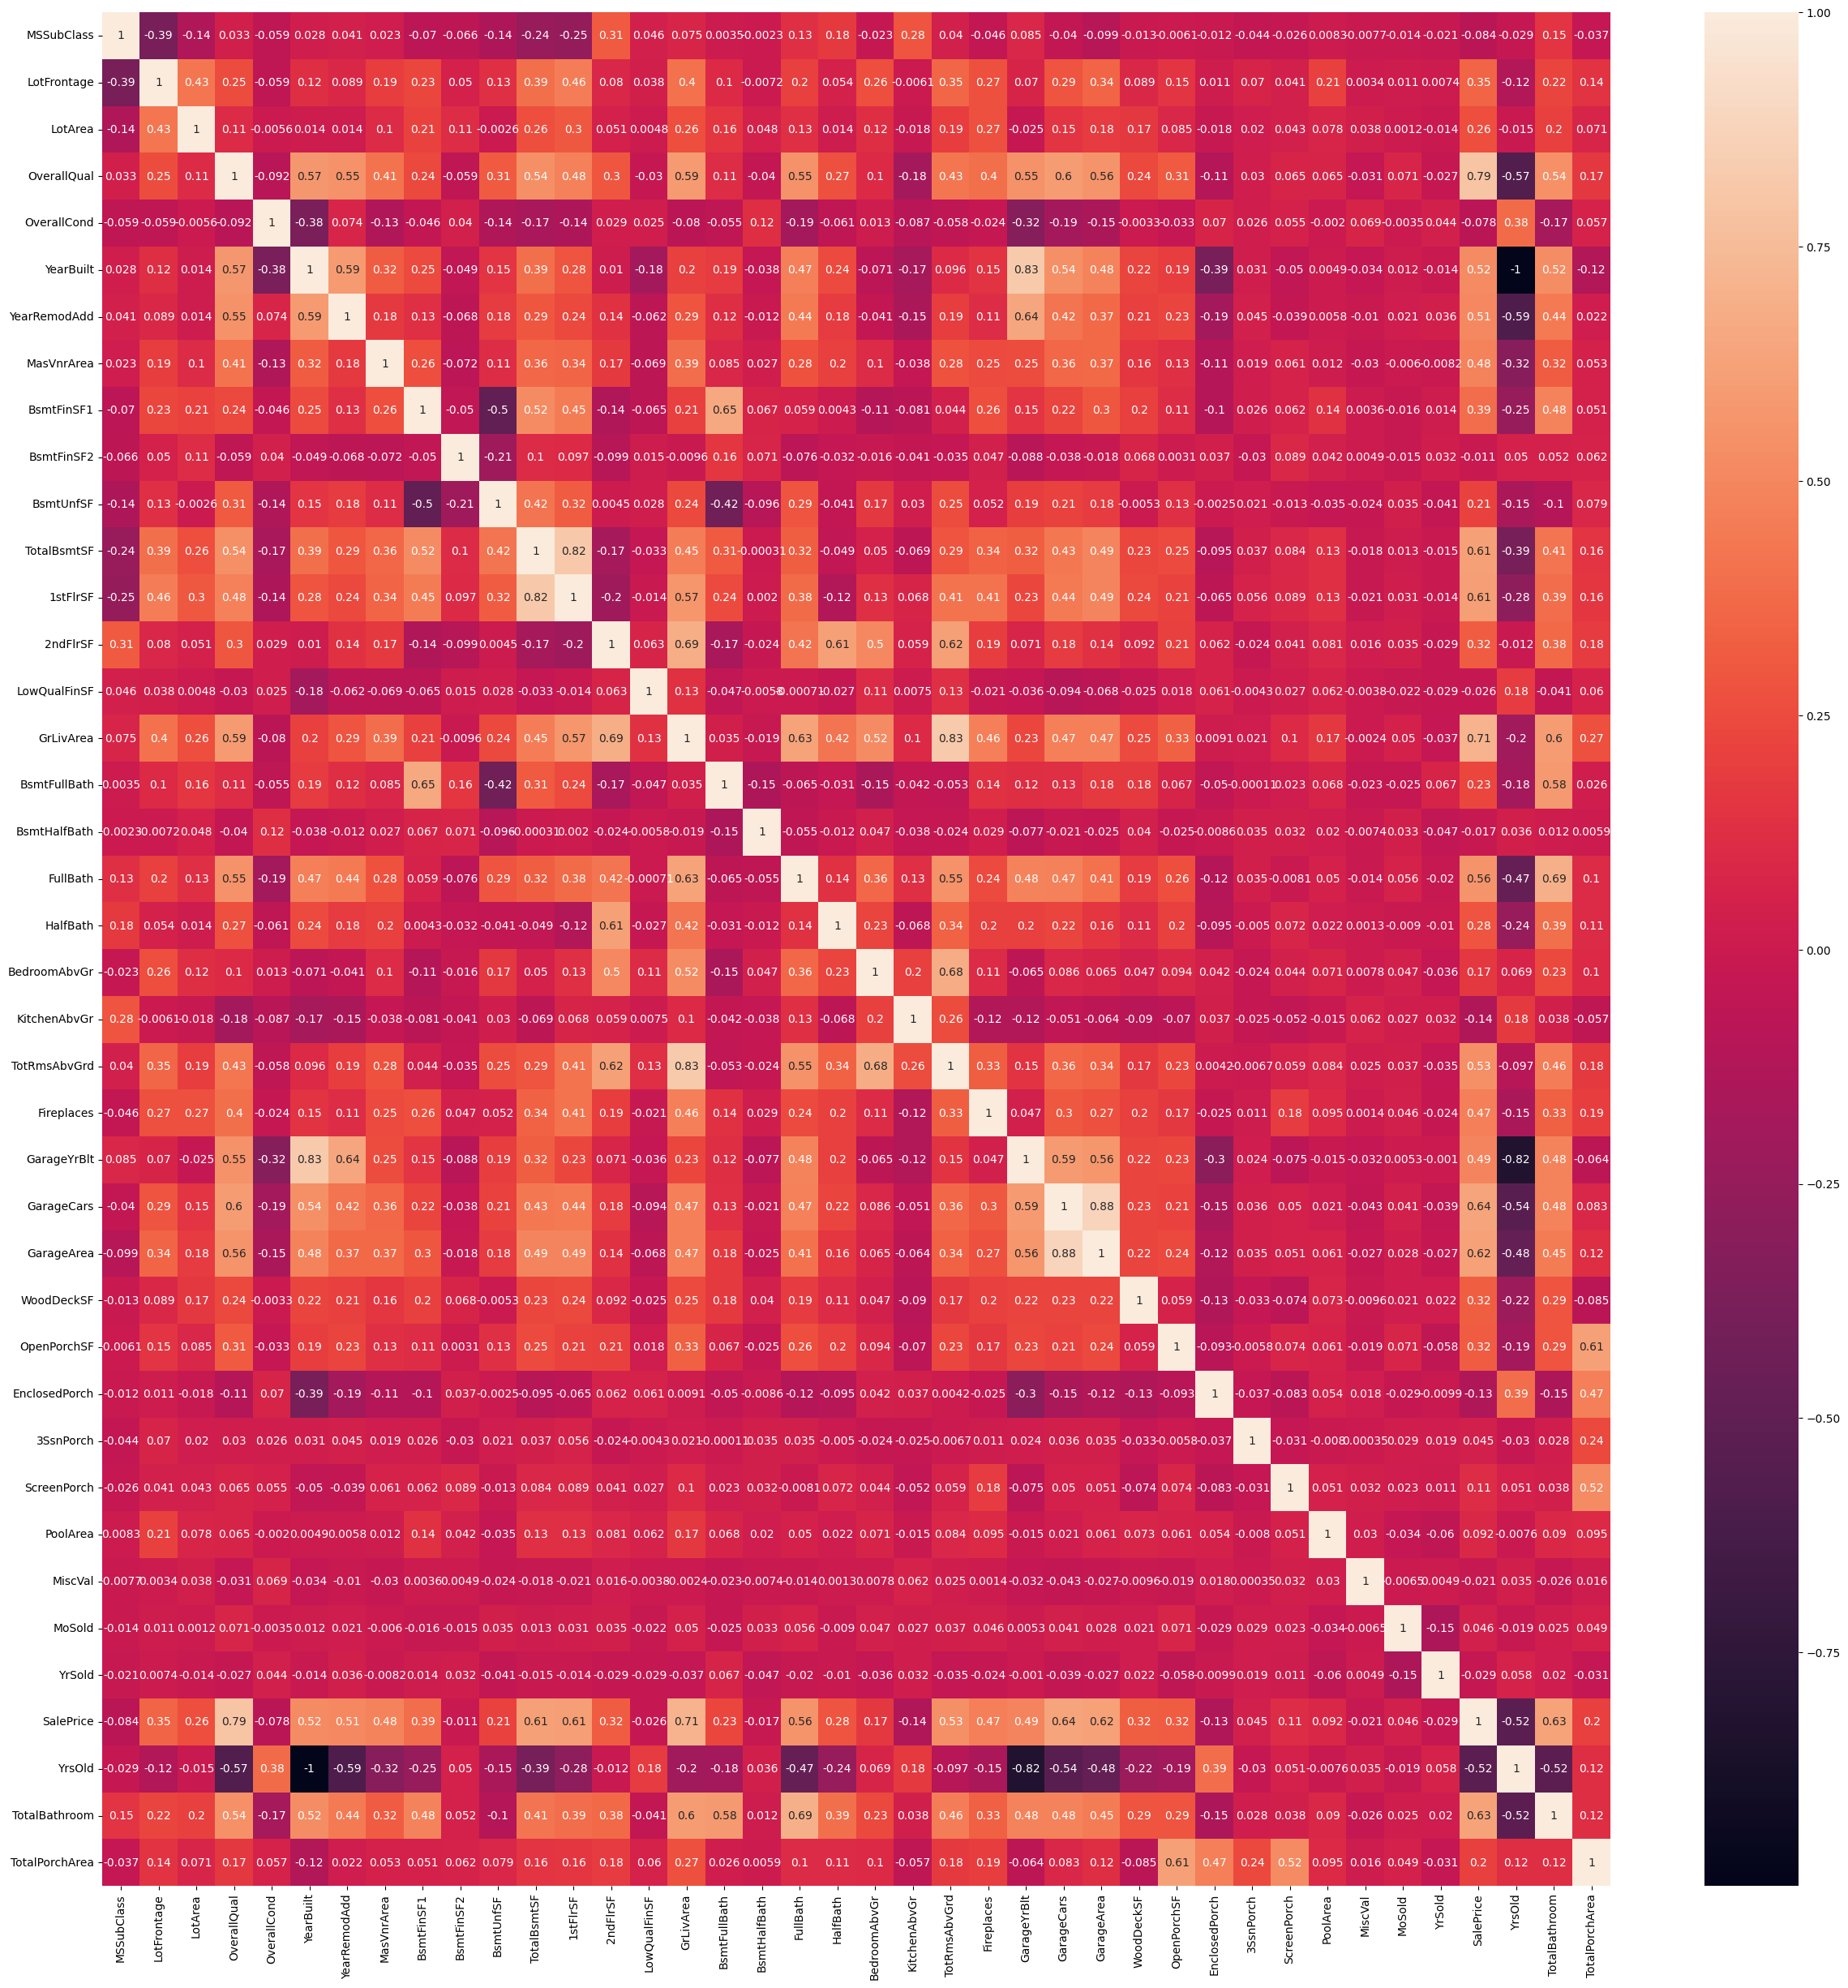

In [117]:
plt.figure(figsize=(30,30))
sns.heatmap(traindf[numeric_features].corr(),annot=True)
plt.show()

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


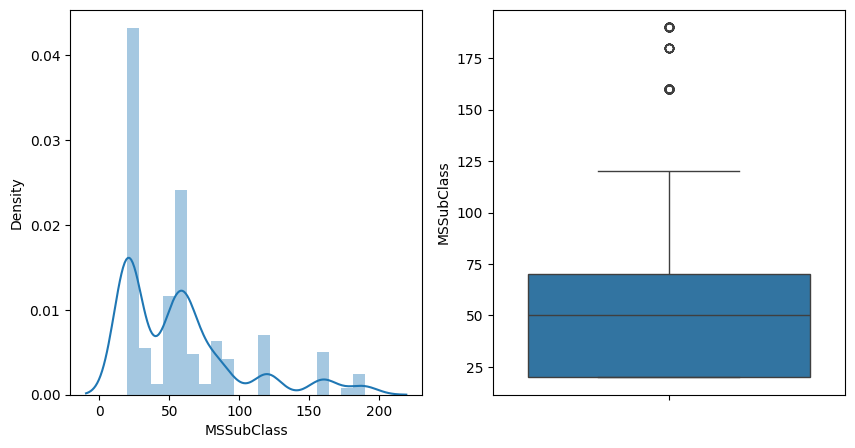

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


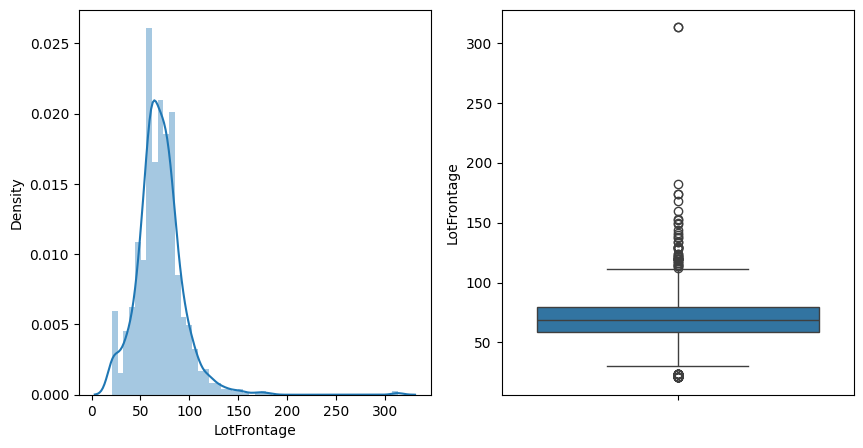

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


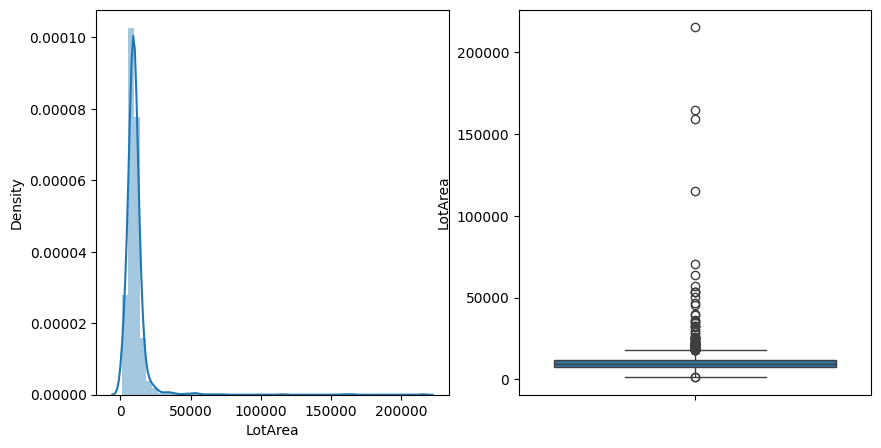

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


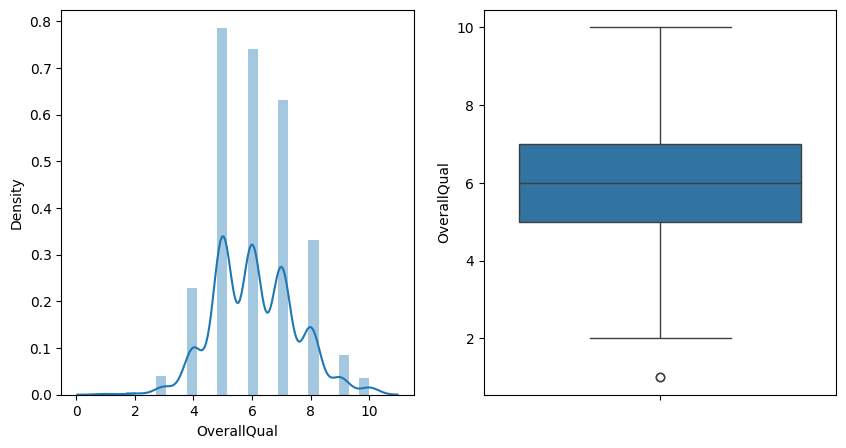

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


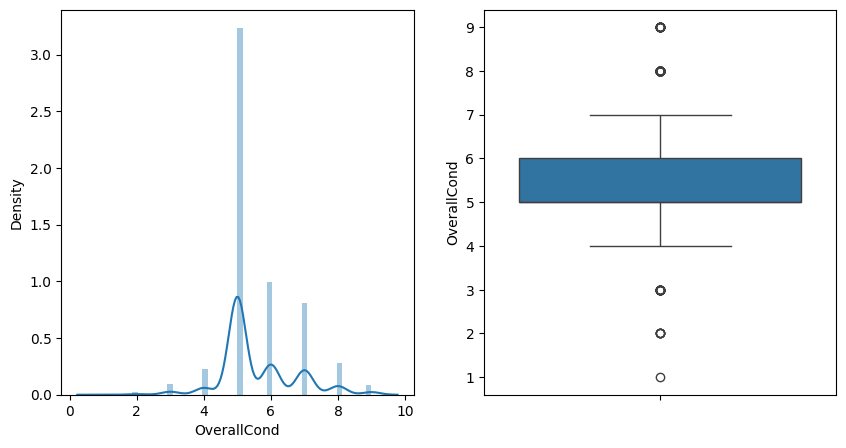

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


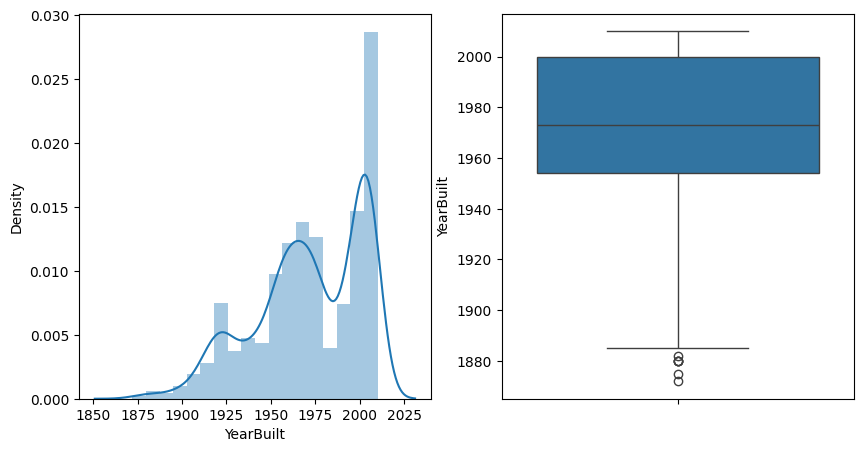

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


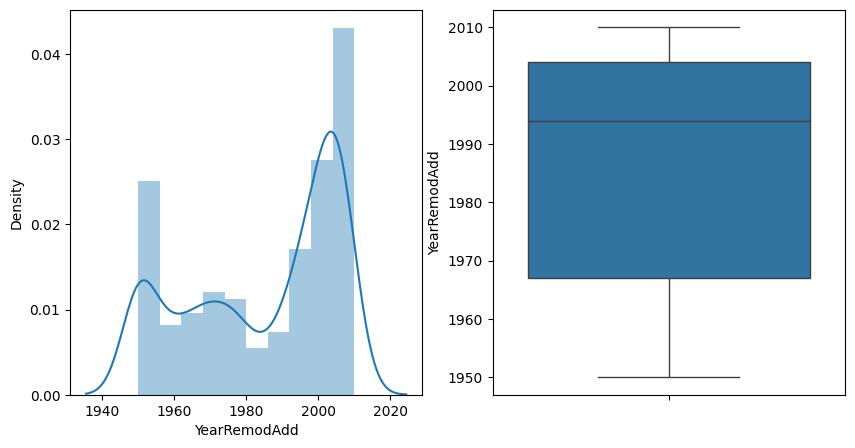

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


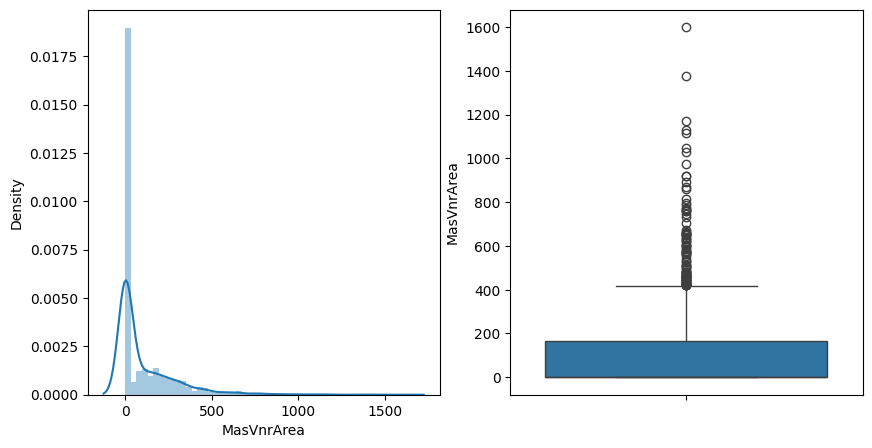

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


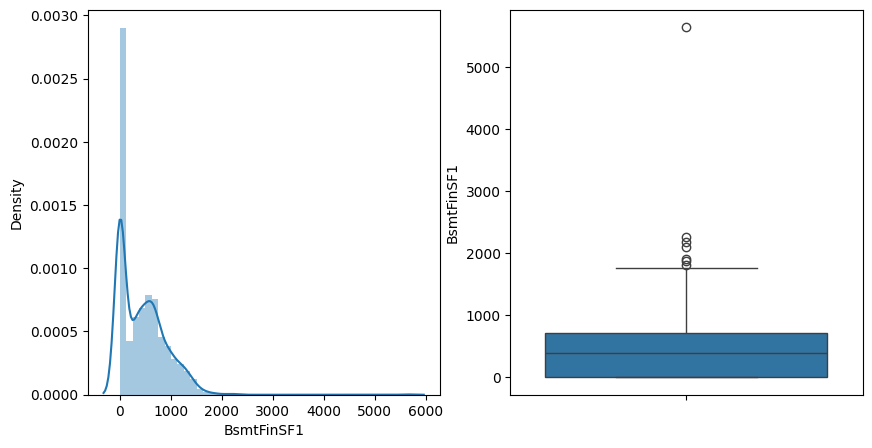

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


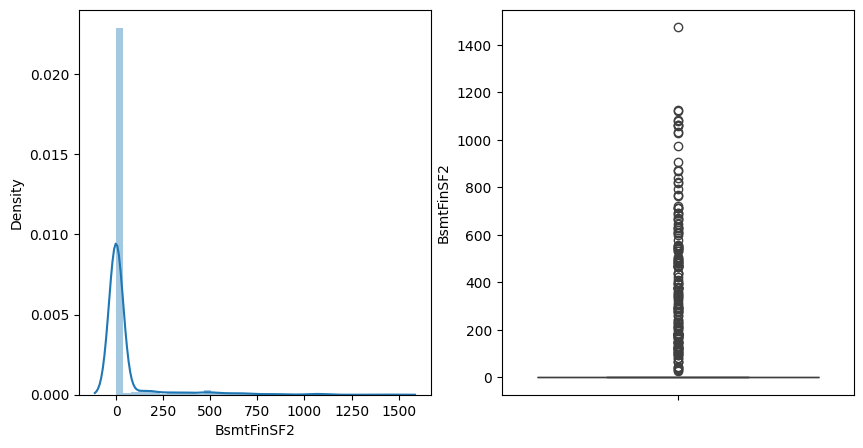

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


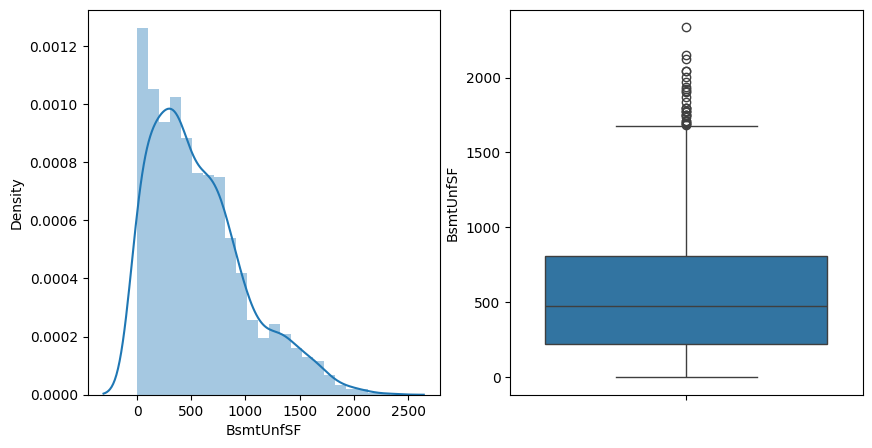

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


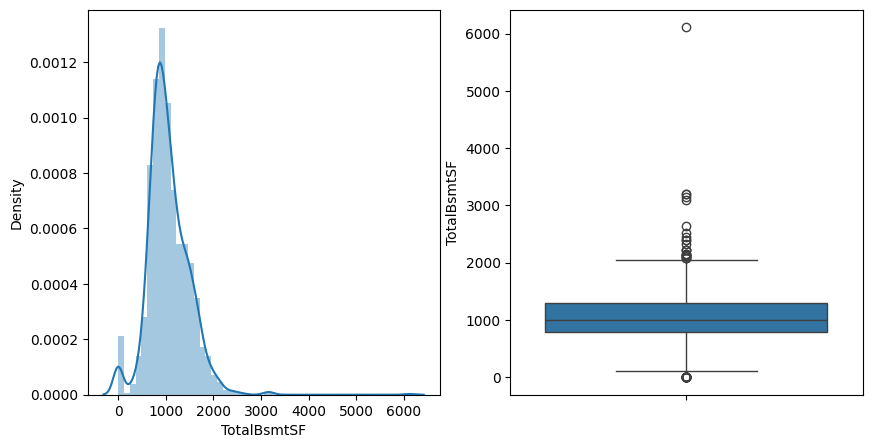

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


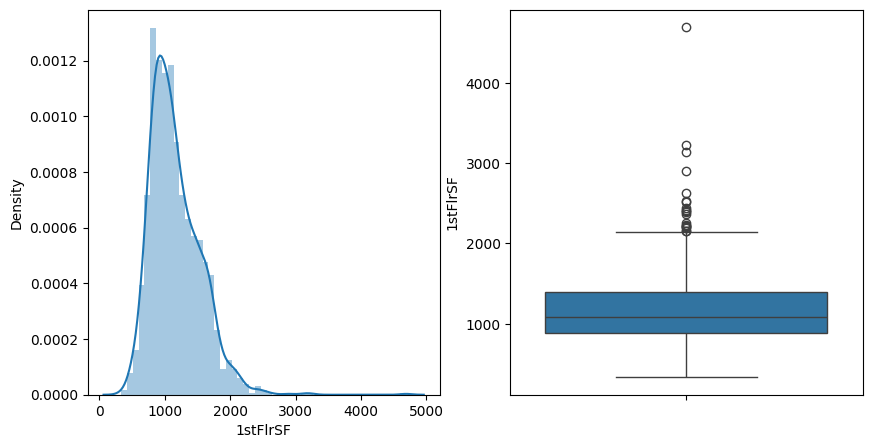

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


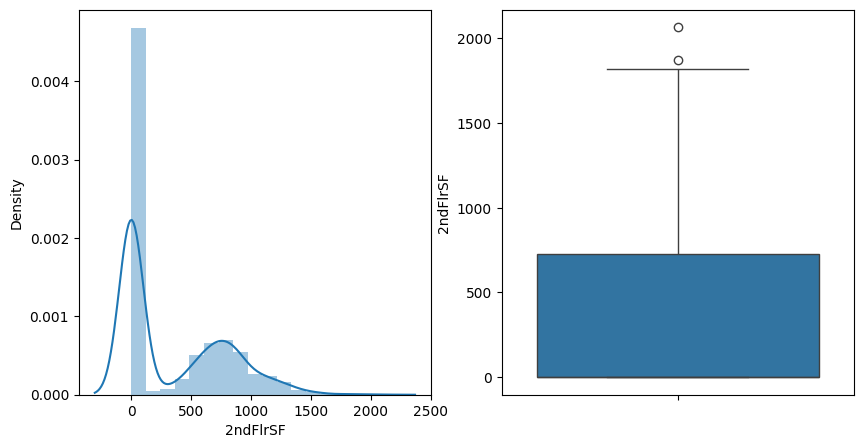

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


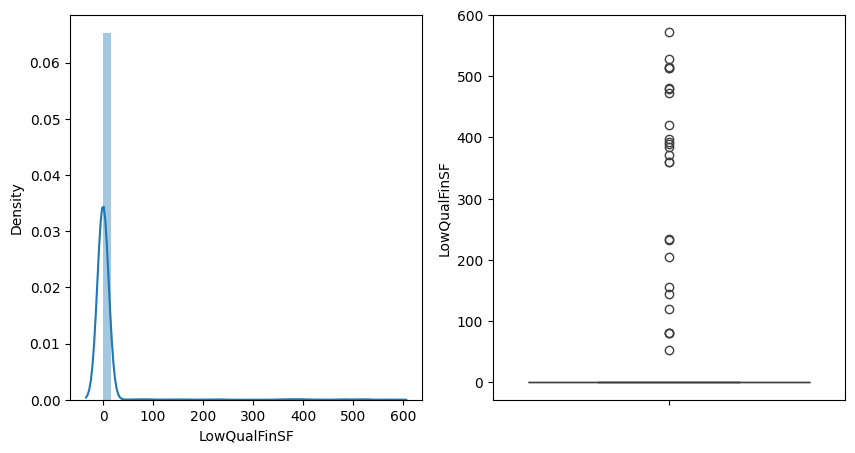

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


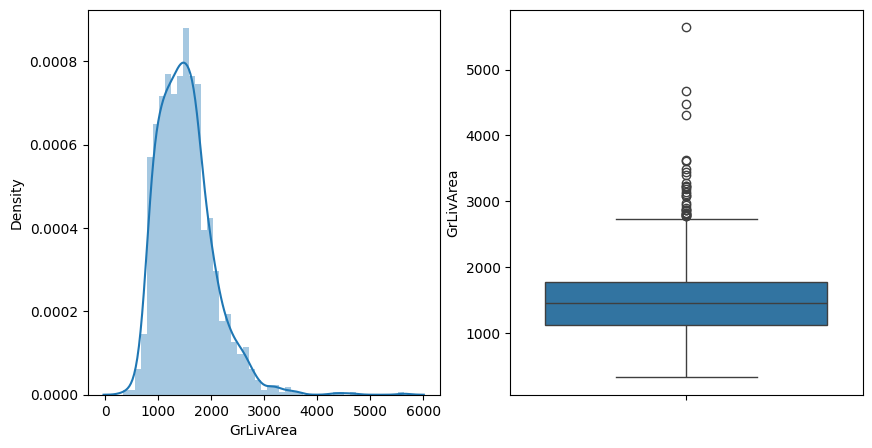

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


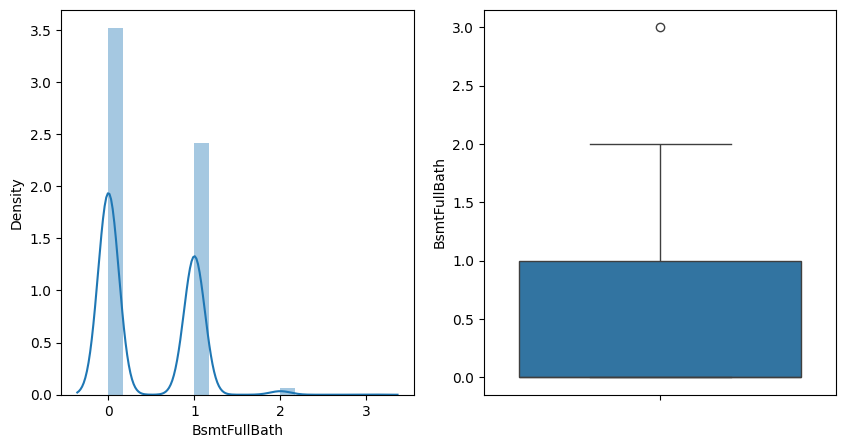

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


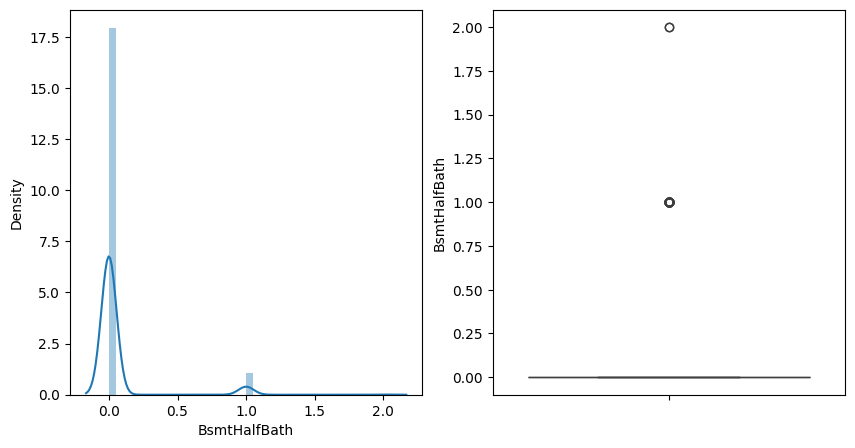

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


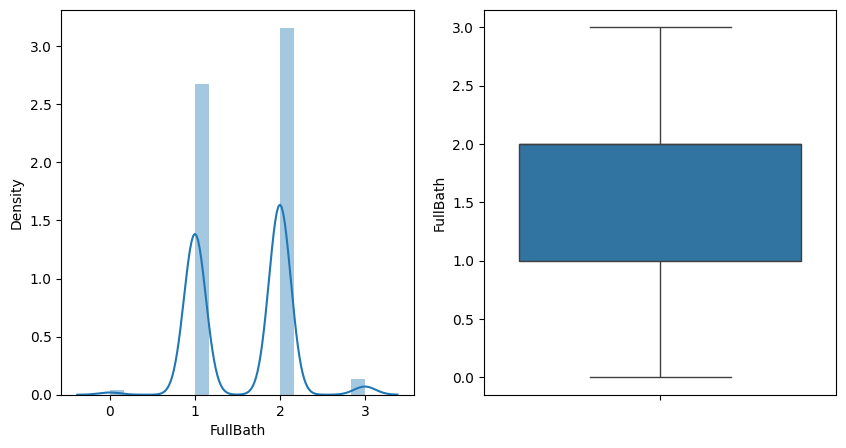

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


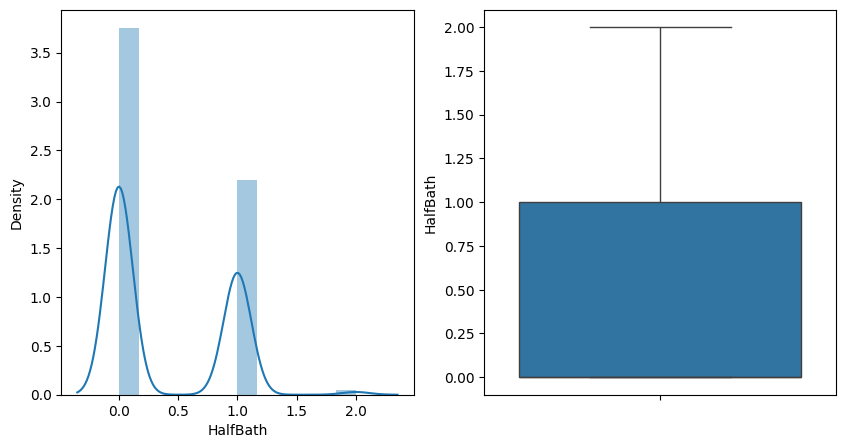

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


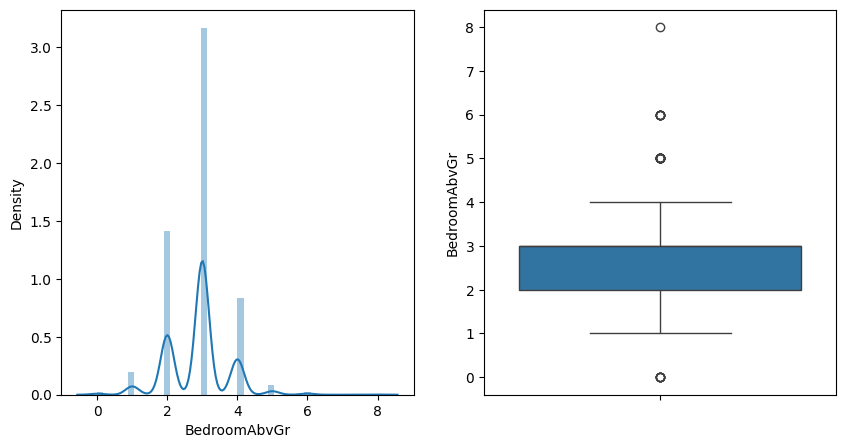

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


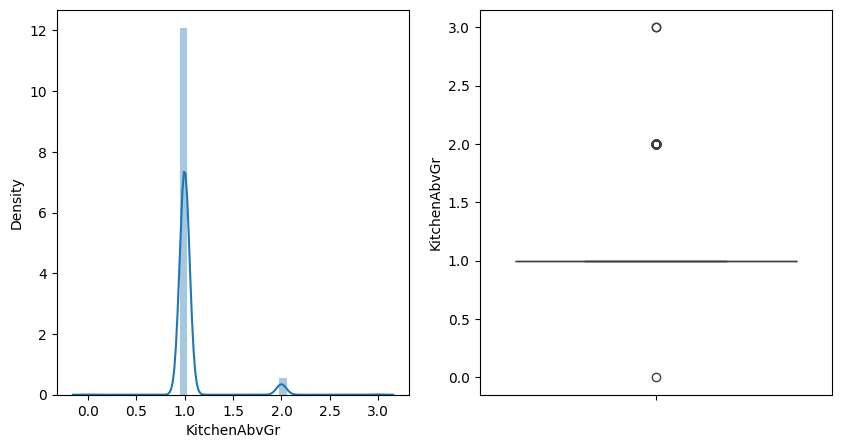

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


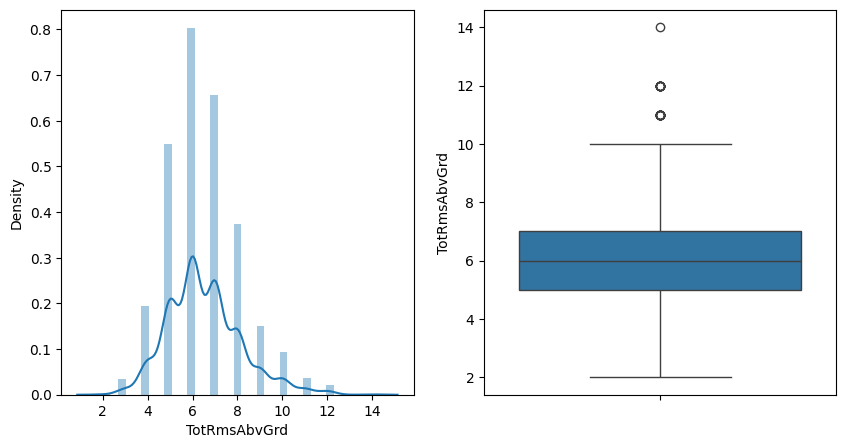

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


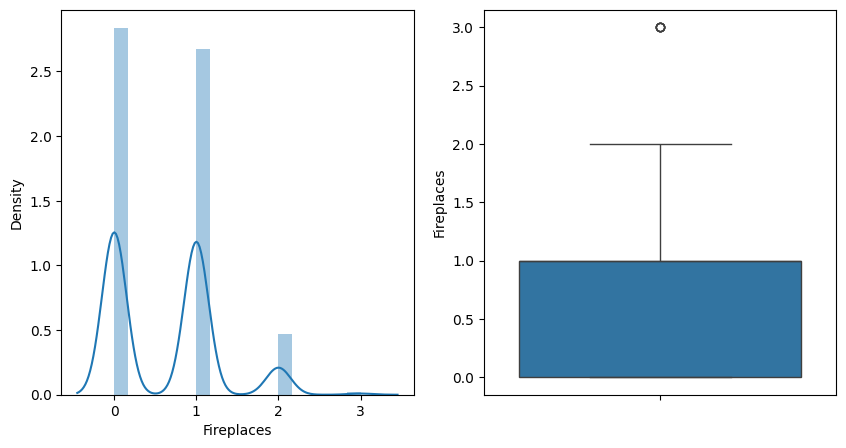

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


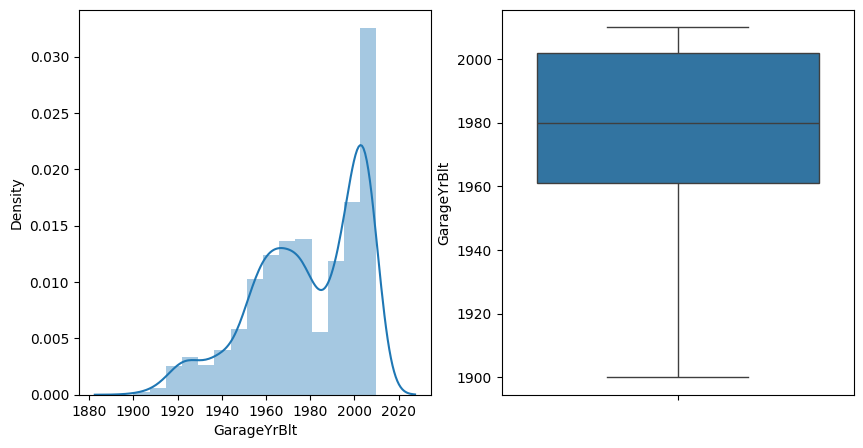

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


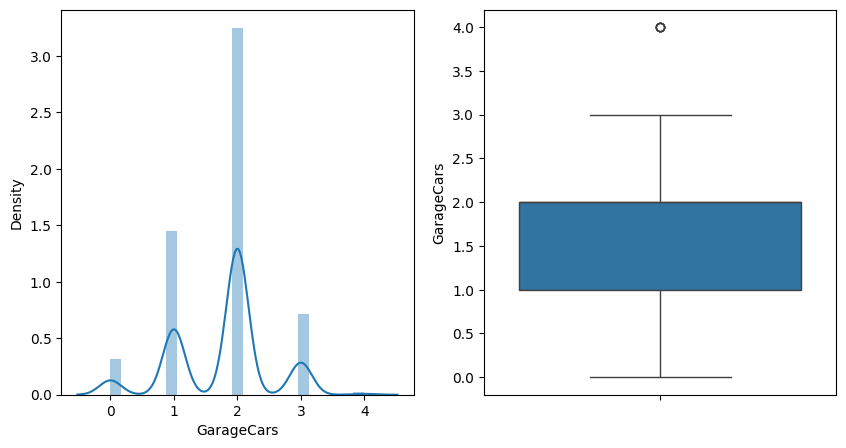

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


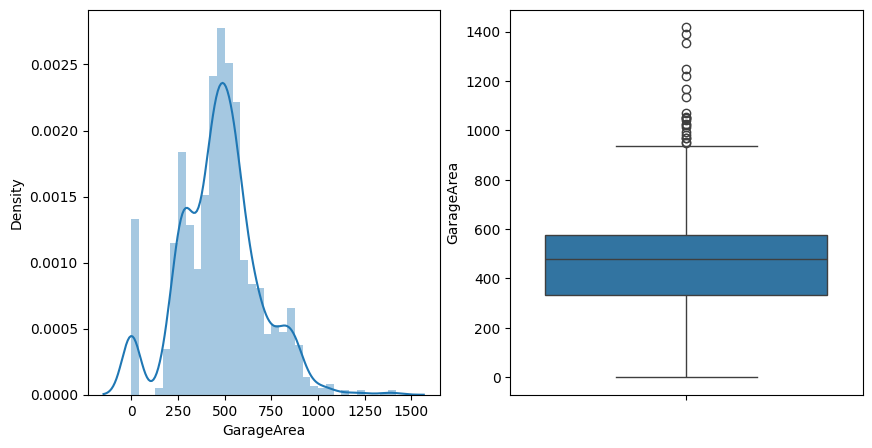

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


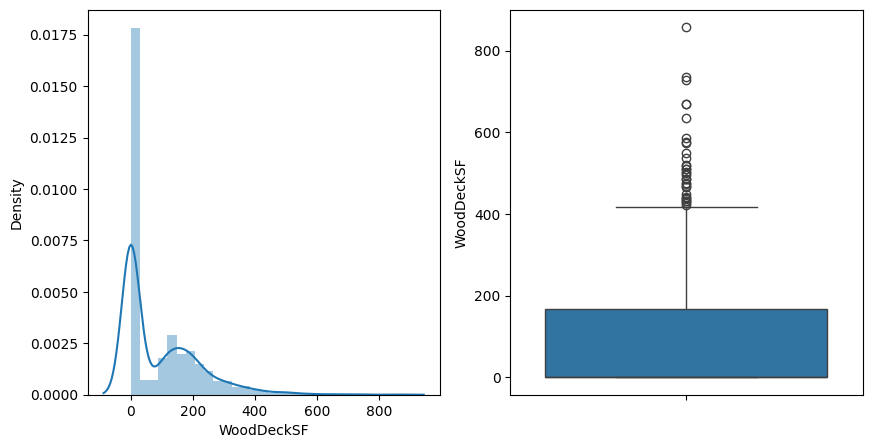

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


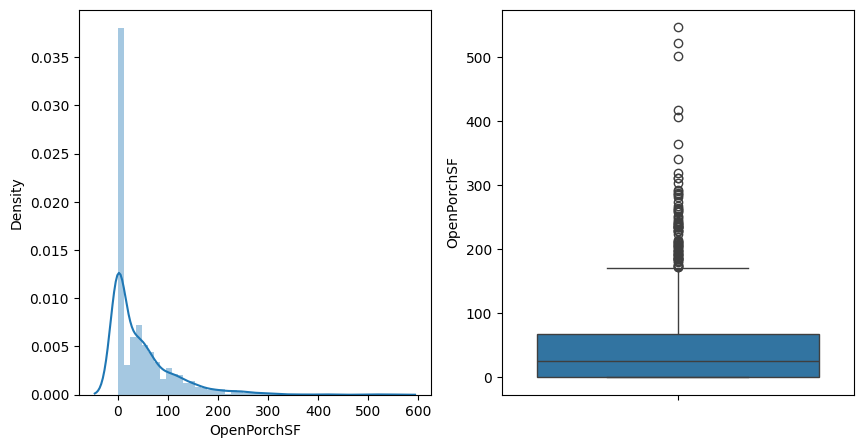

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


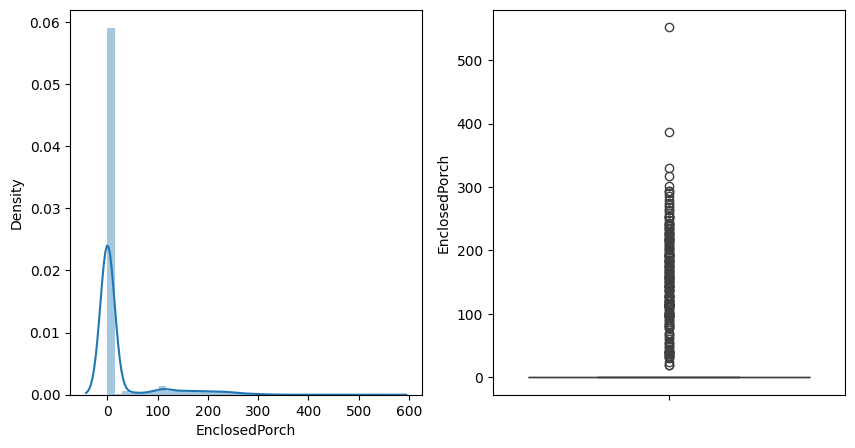

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


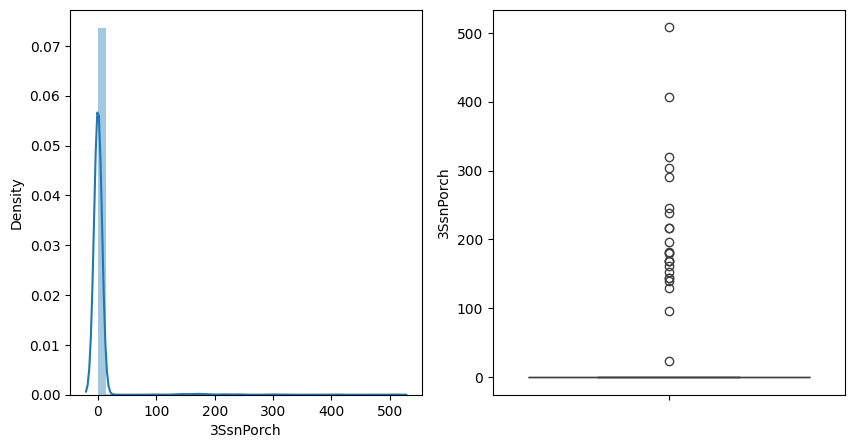

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


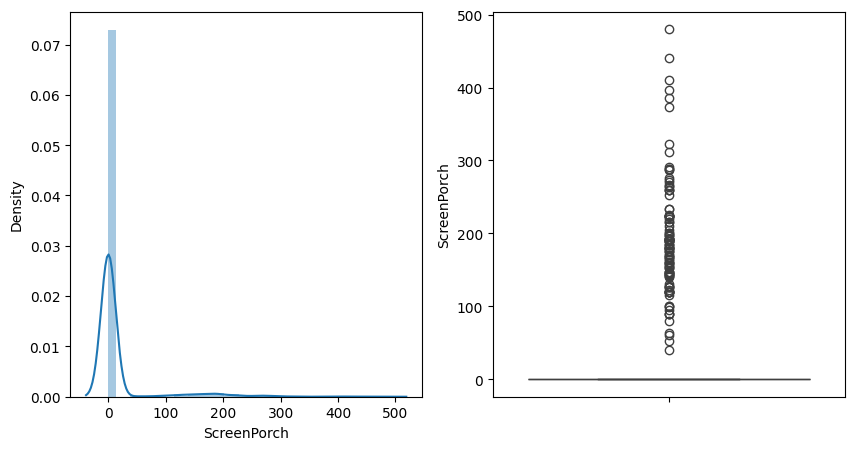

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


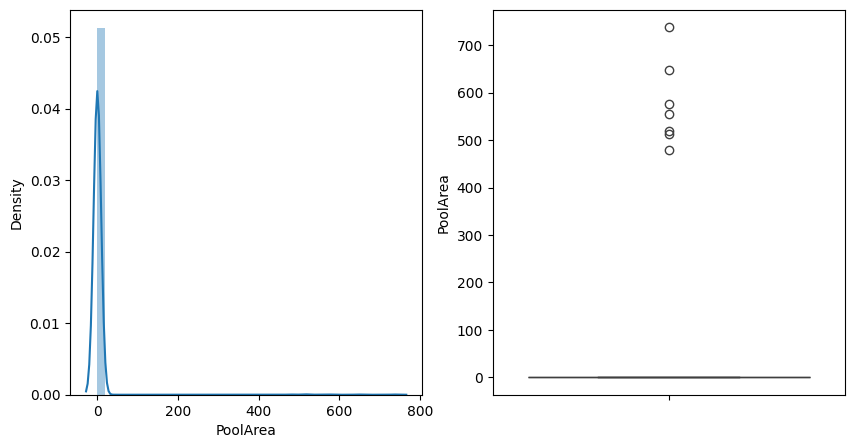

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


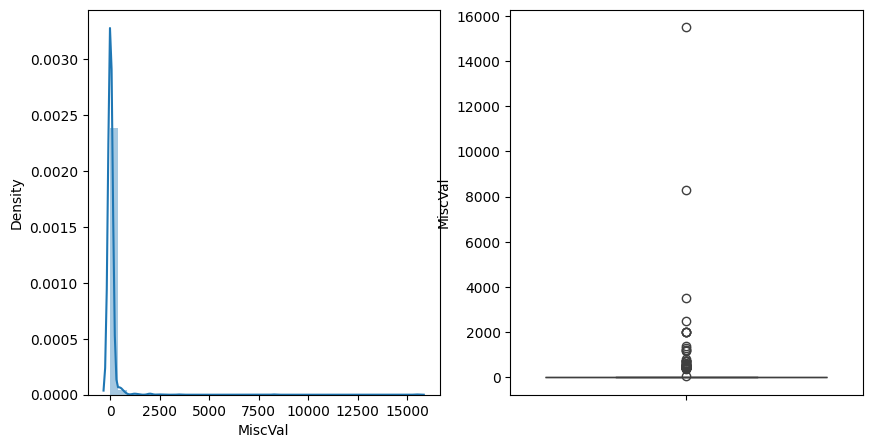

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


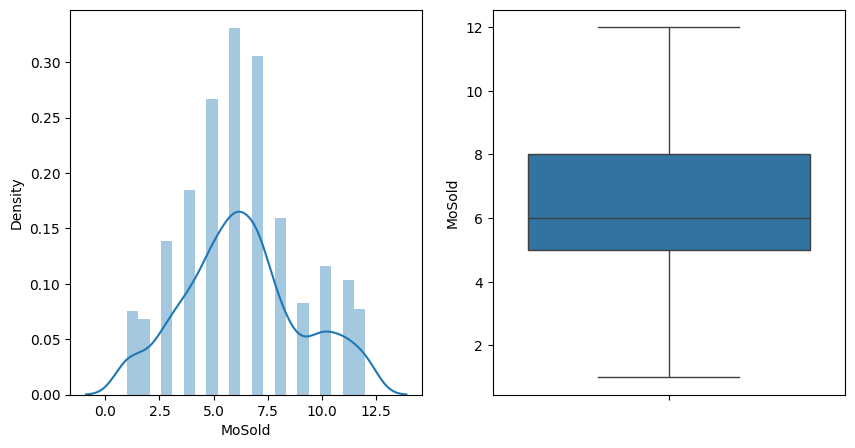

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


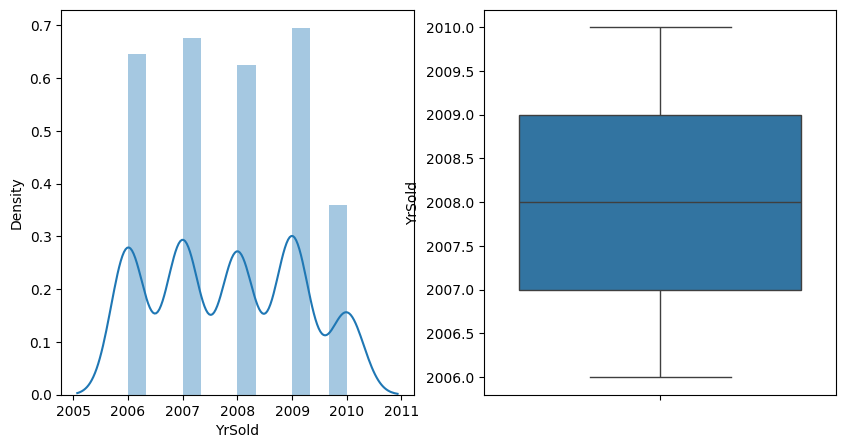

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


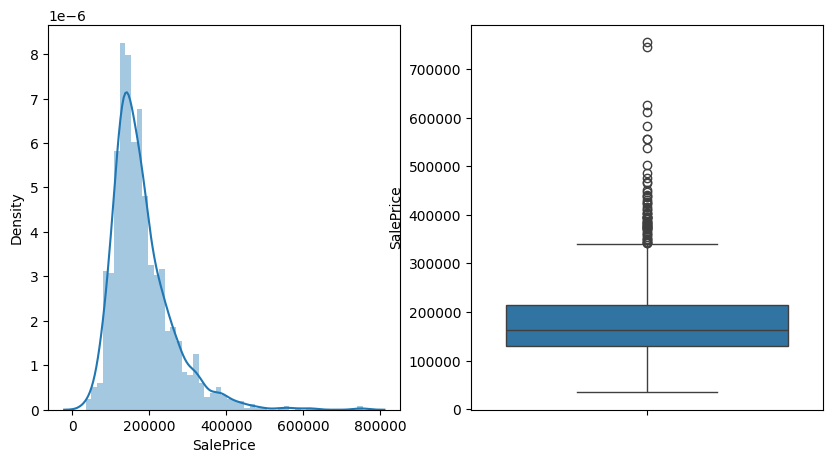

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


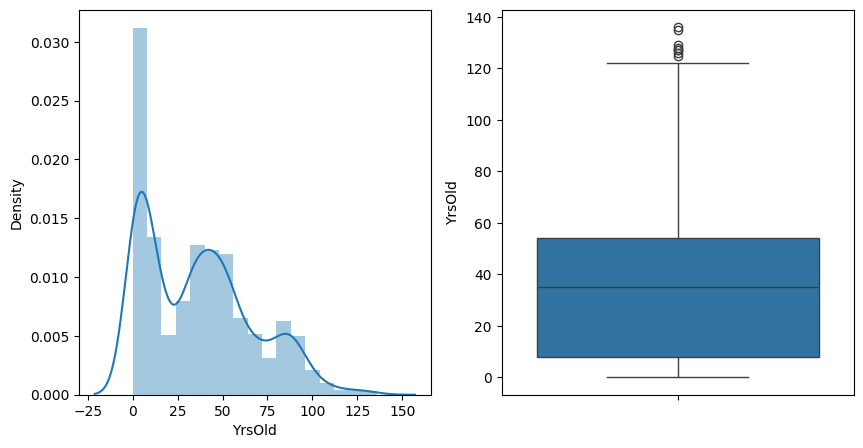

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


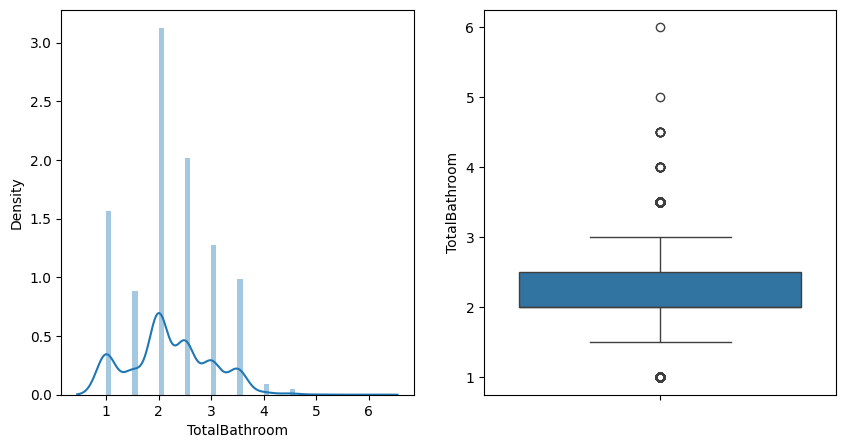

<ipython-input-118-4a73e1669744>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[column])


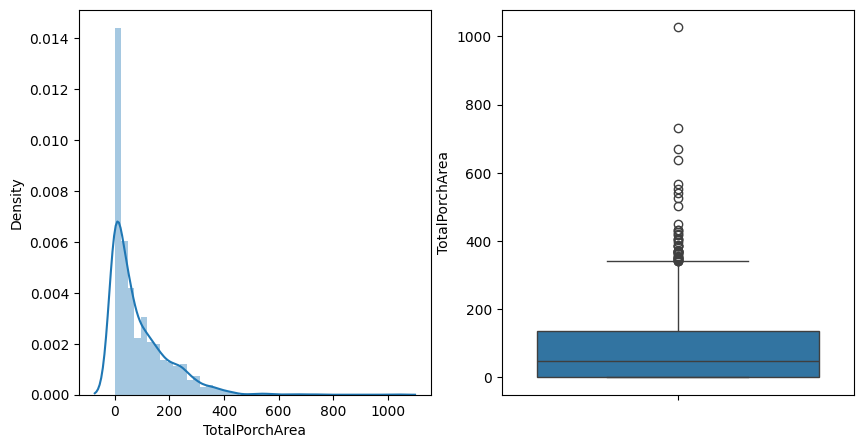

In [118]:
for column in numeric_features:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.distplot(traindf[column])

  plt.subplot(1,2,2)
  sns.boxplot(traindf[column])

  plt.show()

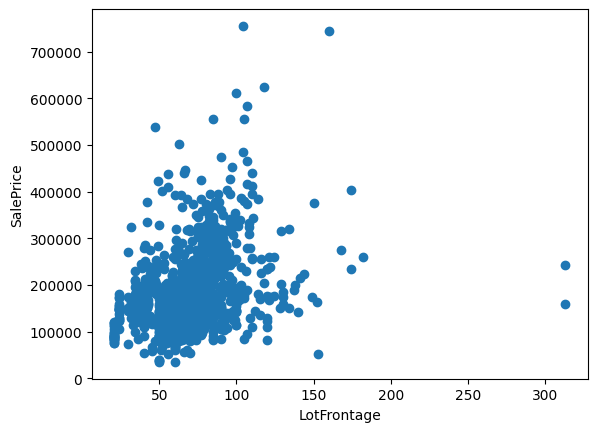

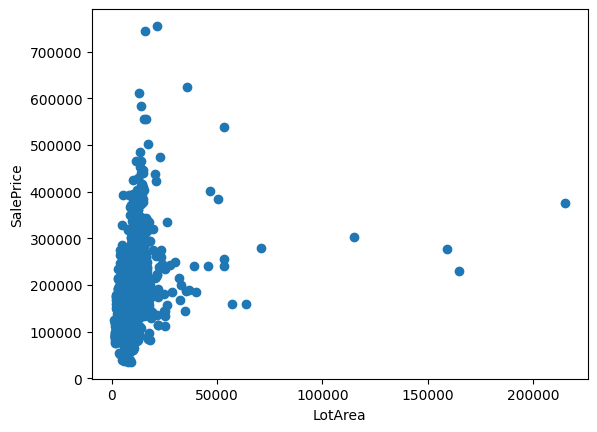

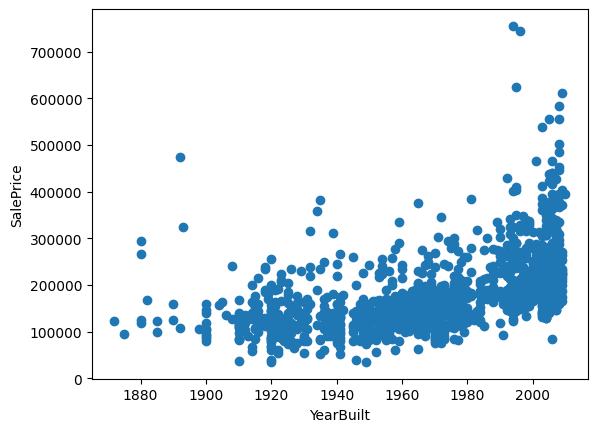

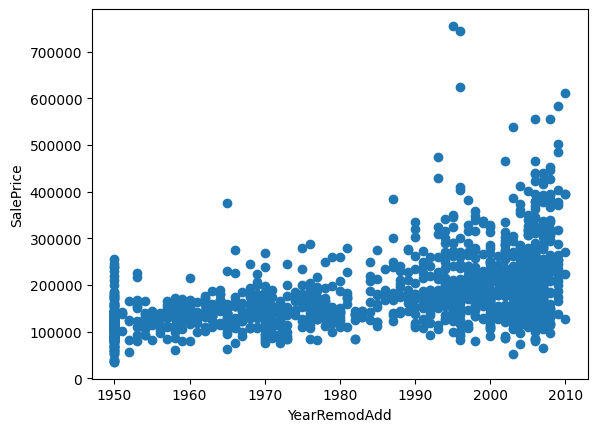

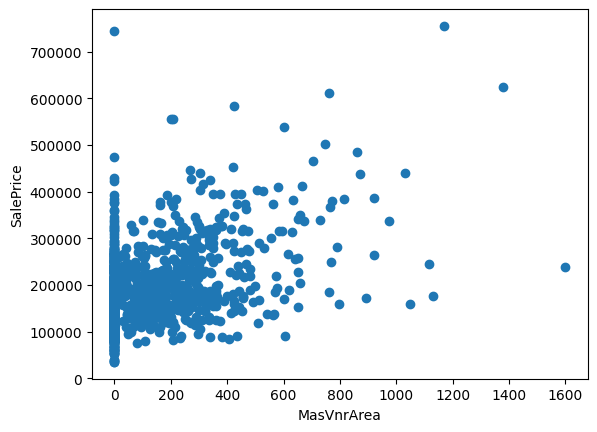

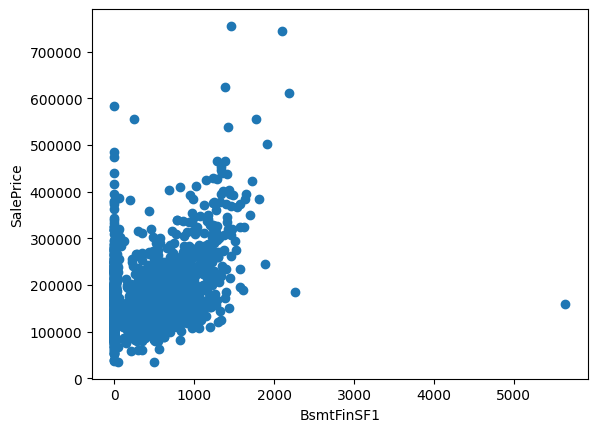

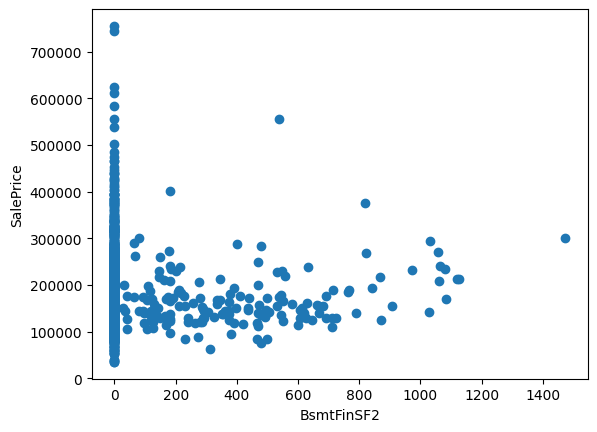

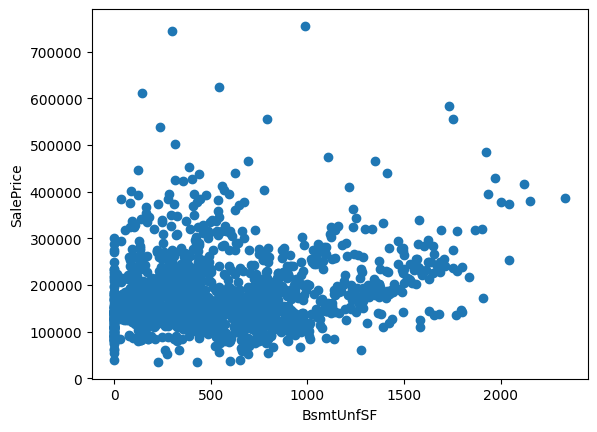

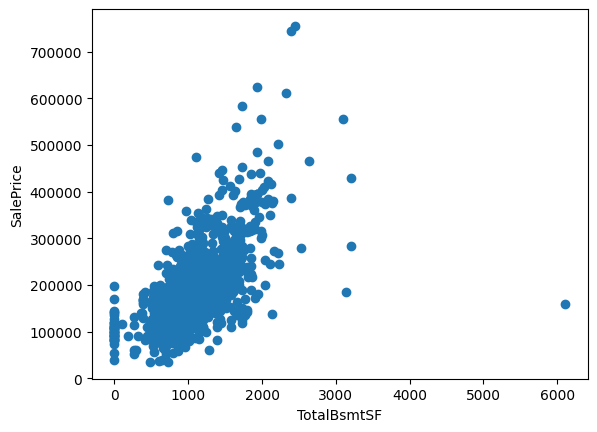

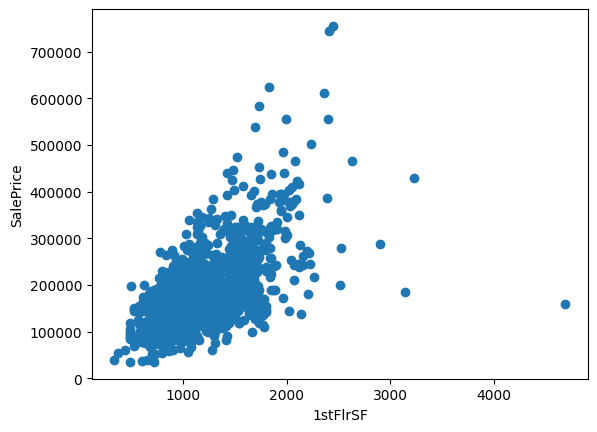

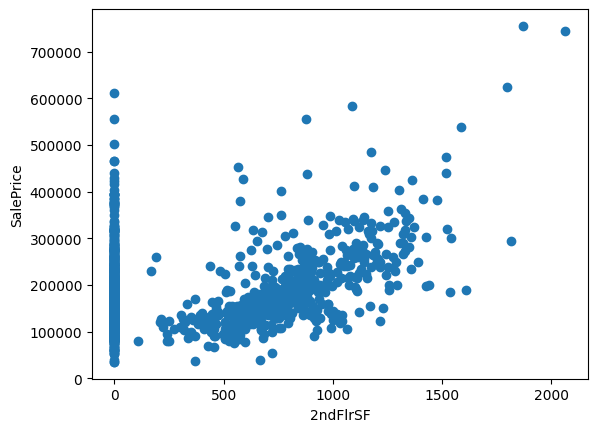

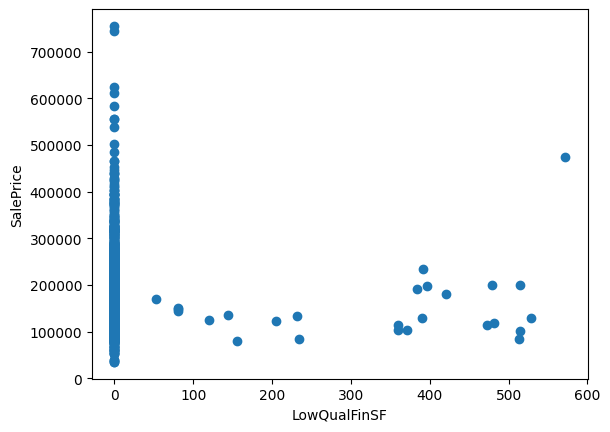

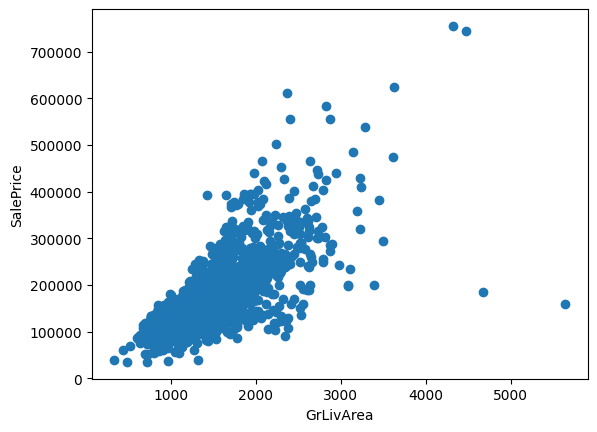

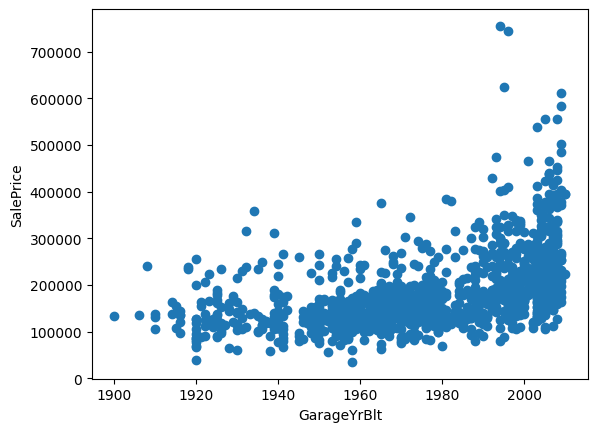

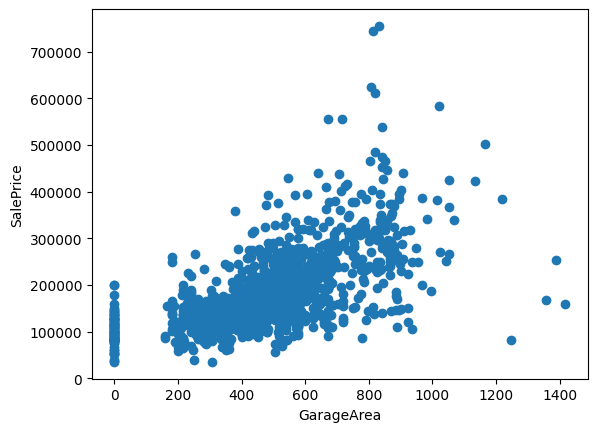

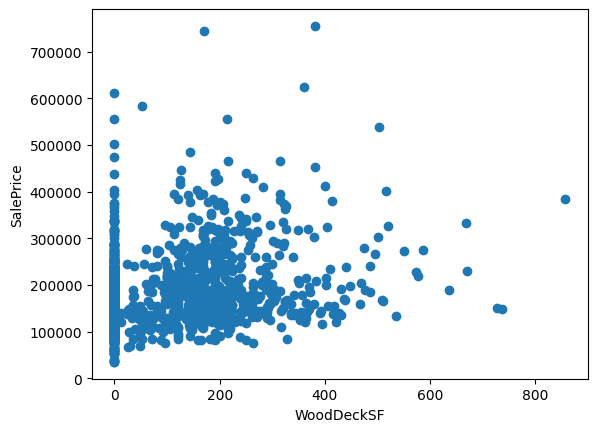

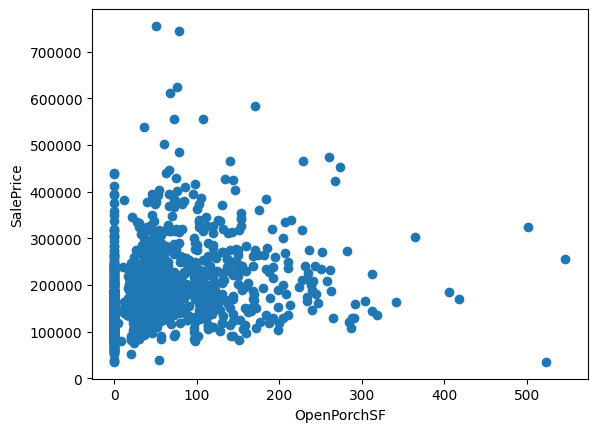

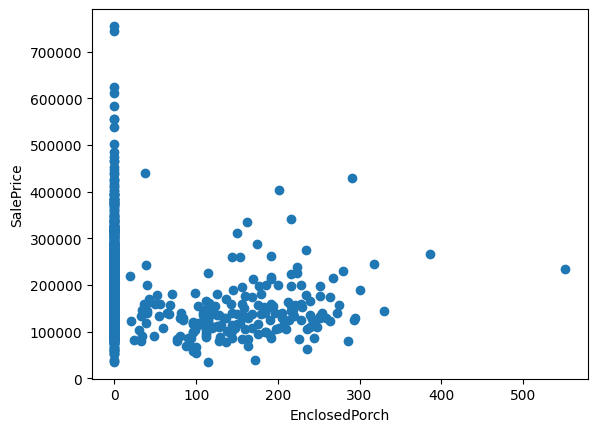

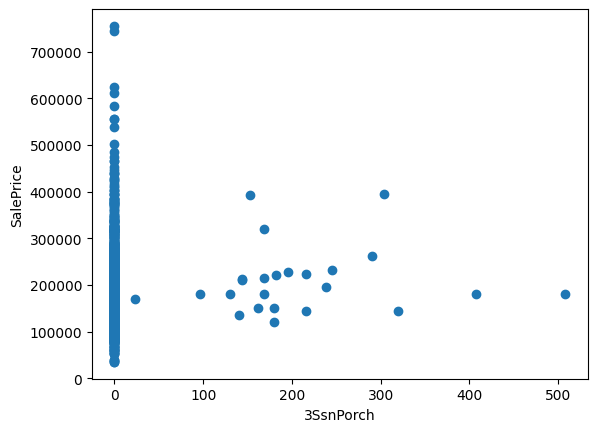

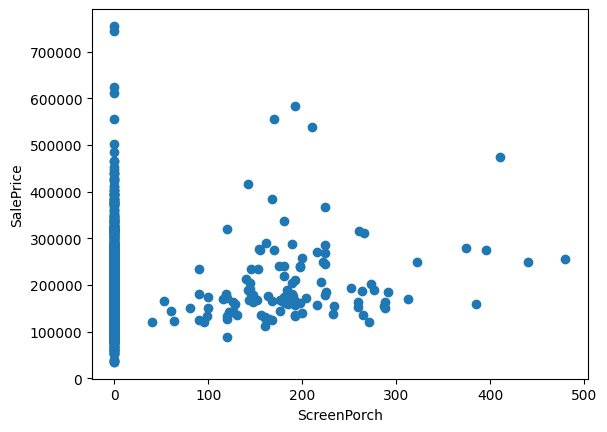

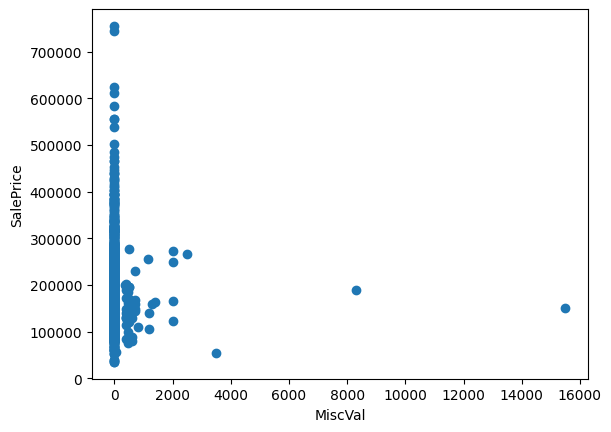

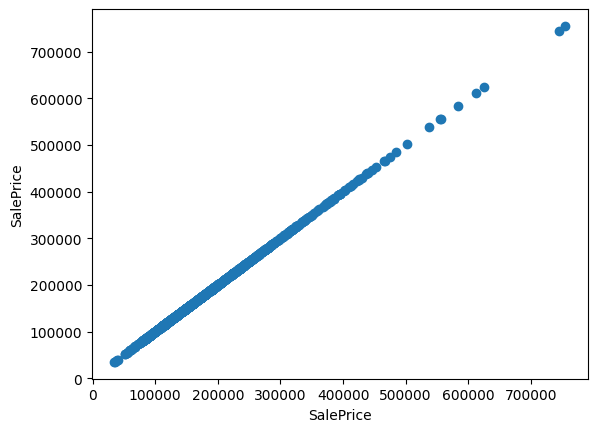

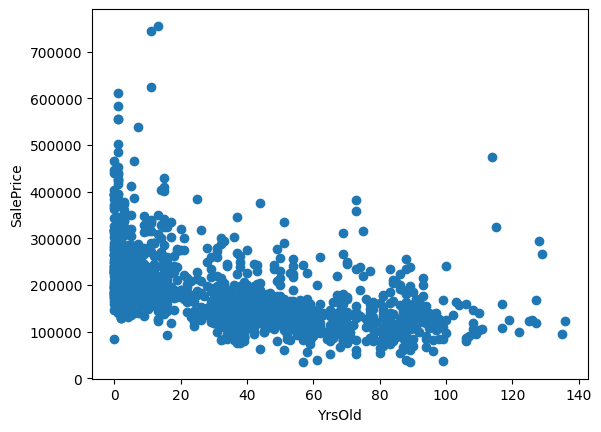

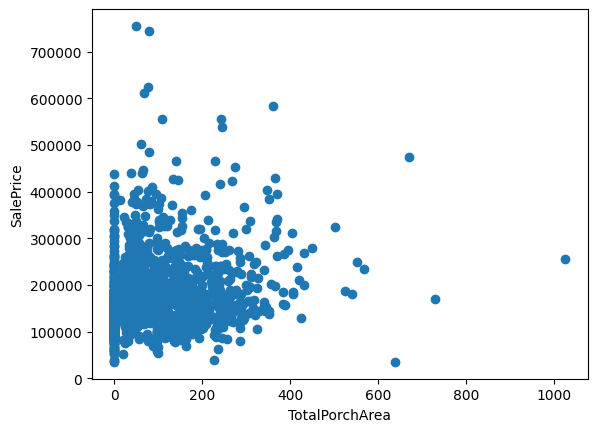

In [119]:
x=[]
for column in numeric_features:
  if len(traindf[column].unique())>15:
    x.append(column)
for feature in x:
  plt.scatter(traindf[feature] ,traindf['SalePrice'])
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.show()

In [120]:
Year_cols=[]
for numeric_feature in numeric_features:
  if 'Yr' in numeric_feature or 'Year' in numeric_feature:
    Year_cols.append(numeric_feature)

for cols in Year_cols:
  if(cols != 'YearBuilt' and cols != 'YrsOld'):
    traindf[cols]=traindf[cols]-traindf['YearBuilt']

traindf=traindf.drop(columns='YearBuilt')
Year_cols.remove('YearBuilt')
# Convert the Index to a list before removing the element
numeric_features = numeric_features.tolist()
numeric_features.remove('YearBuilt')

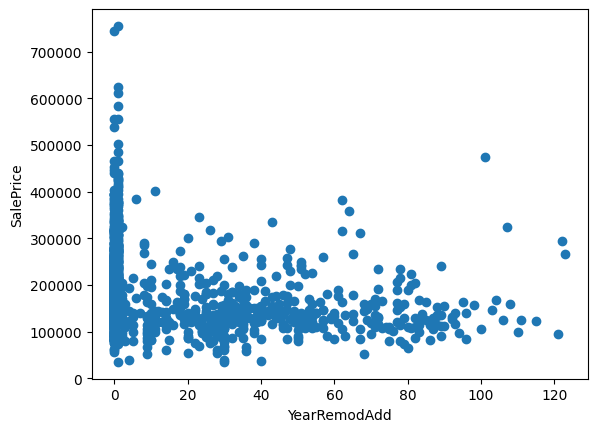

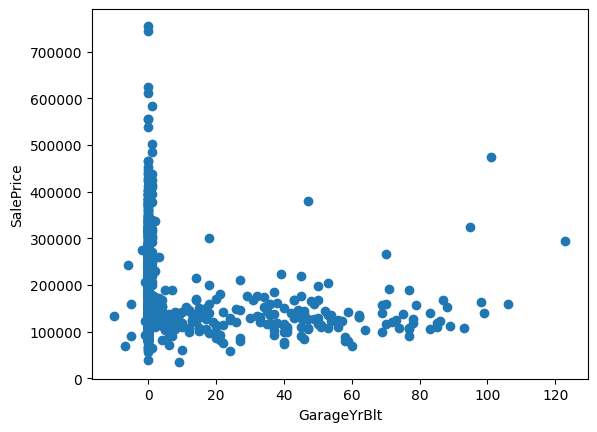

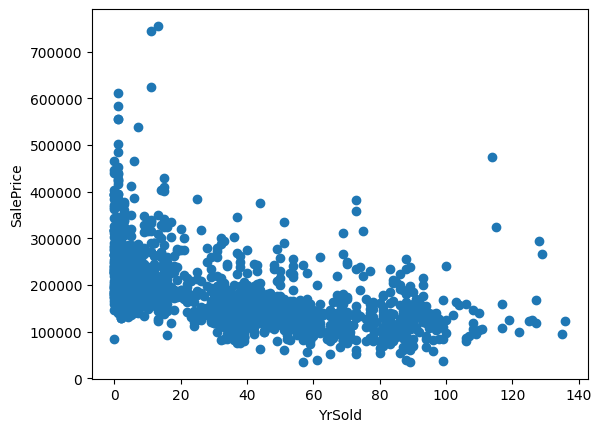

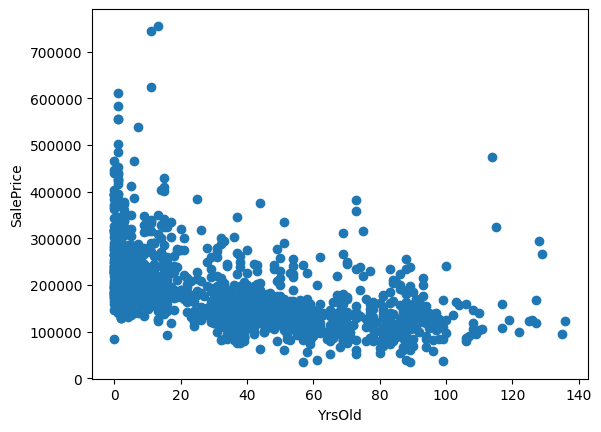

In [121]:
for feature in Year_cols:
  plt.scatter(traindf[feature] ,traindf['SalePrice'])
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.show()

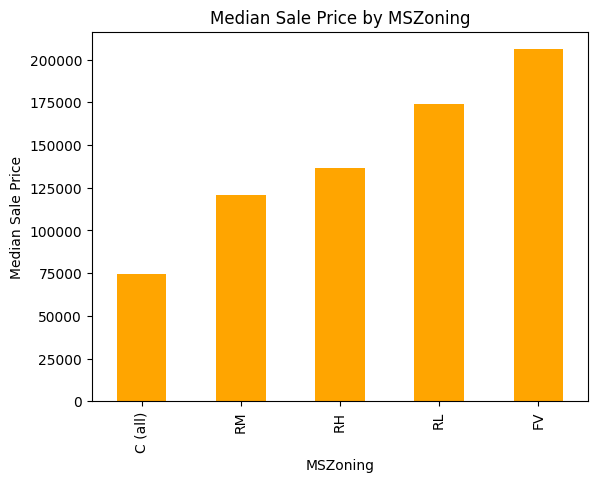

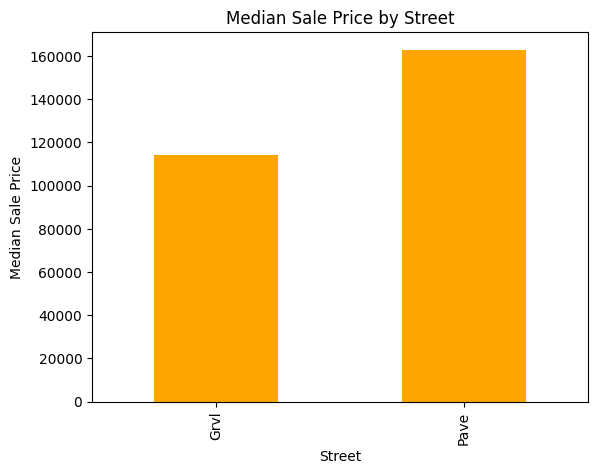

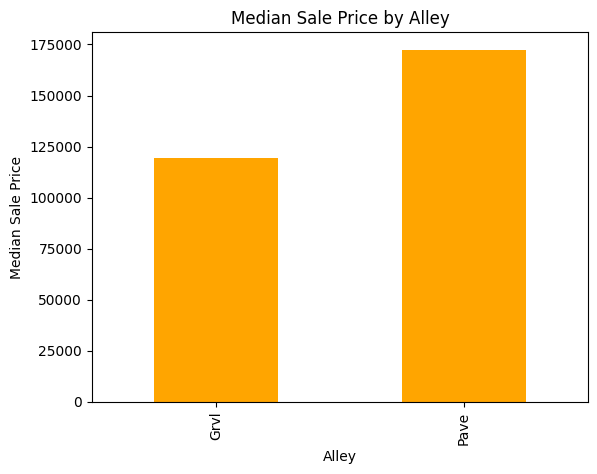

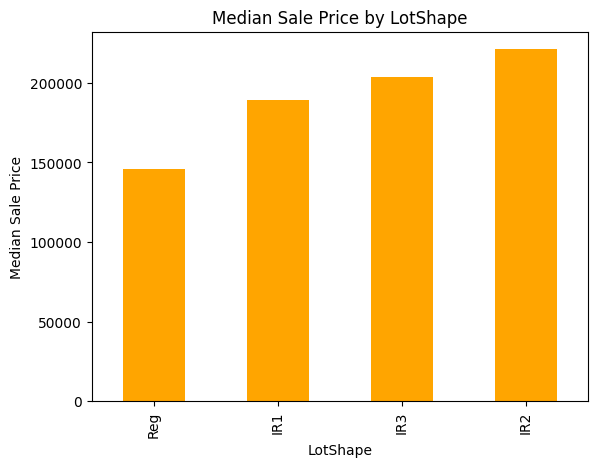

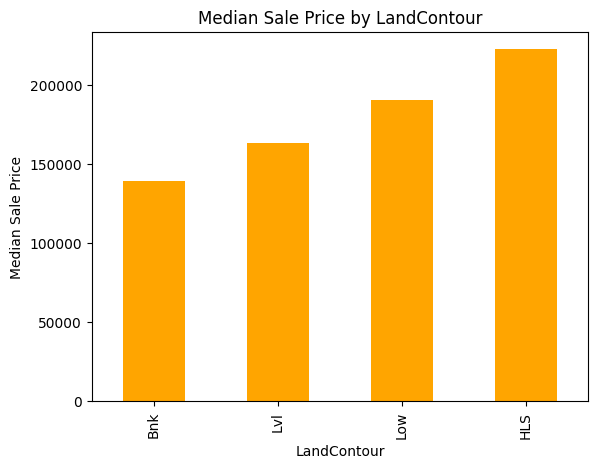

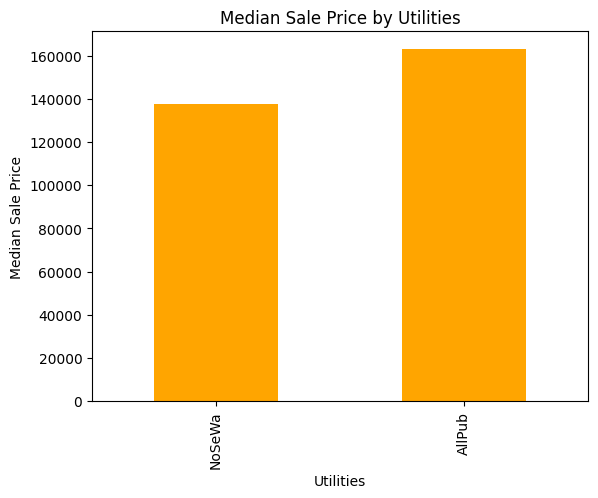

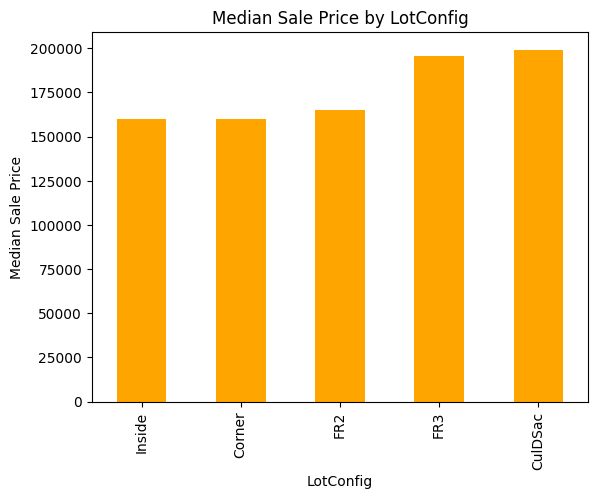

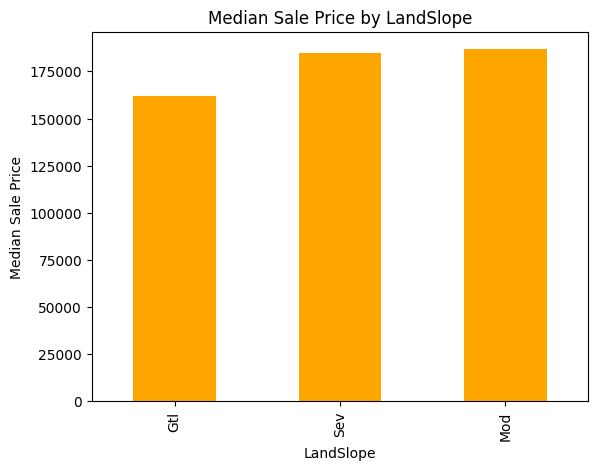

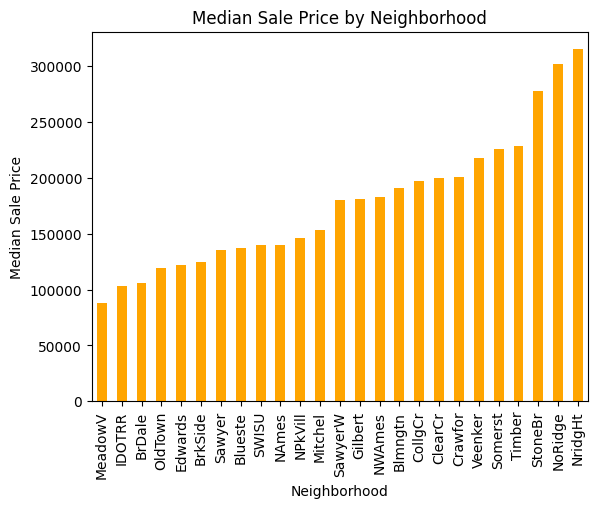

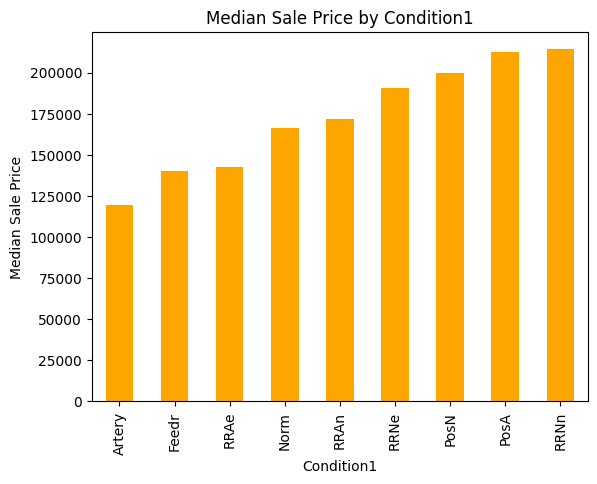

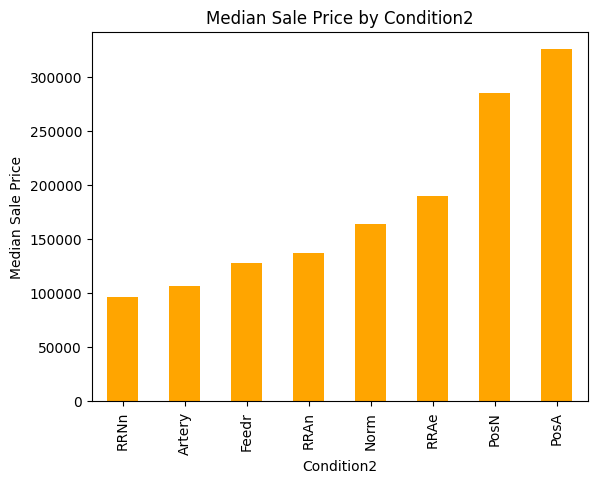

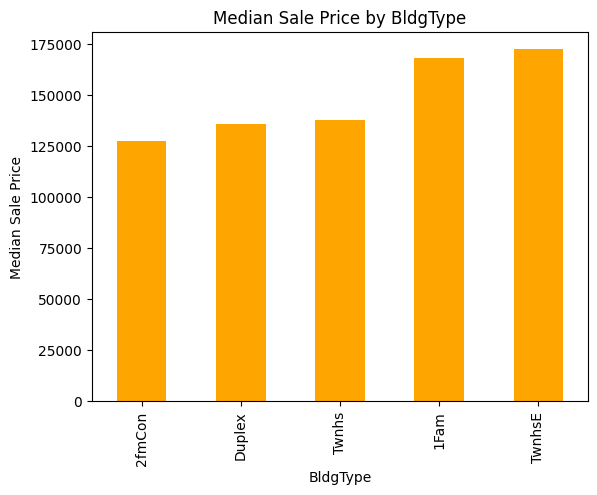

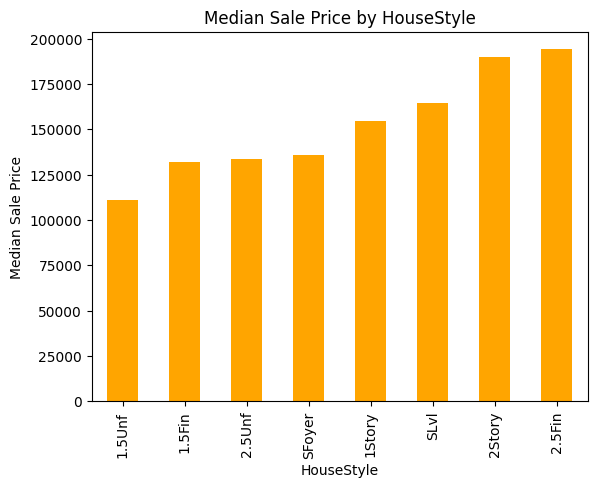

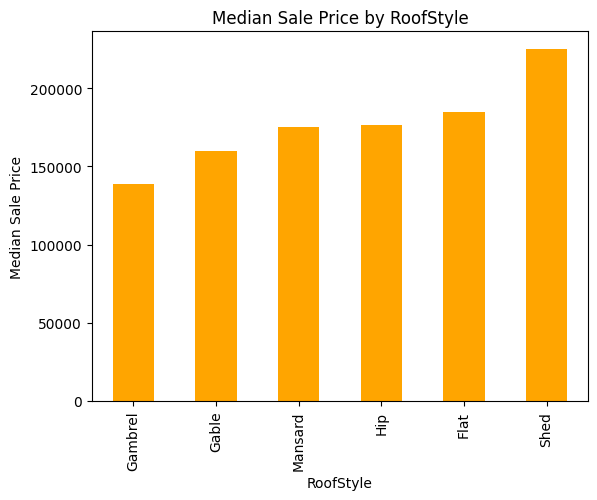

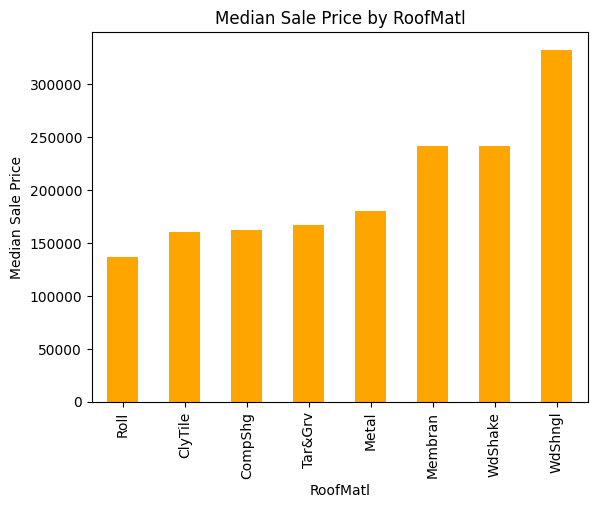

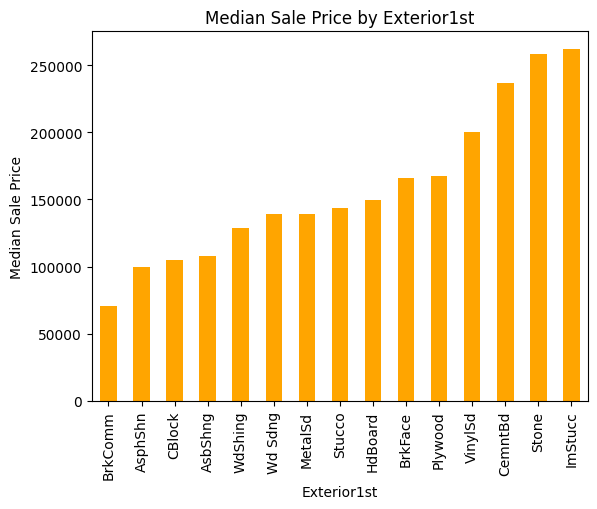

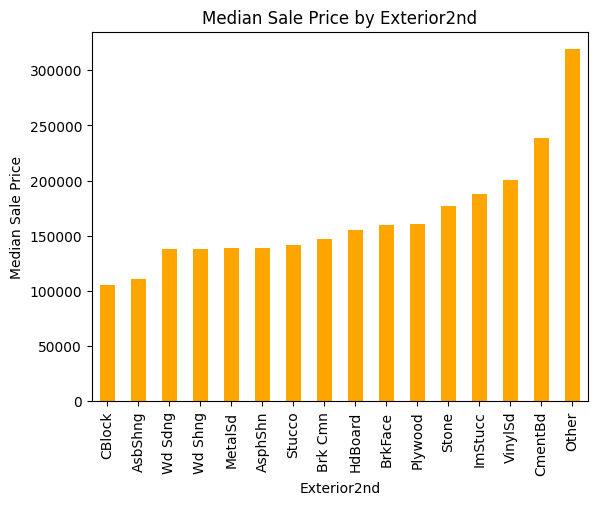

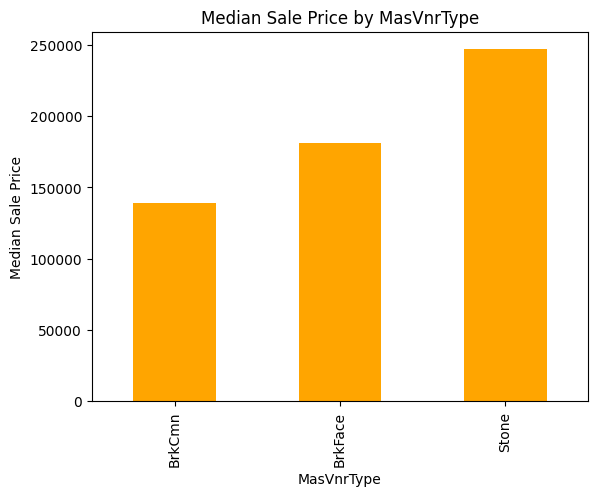

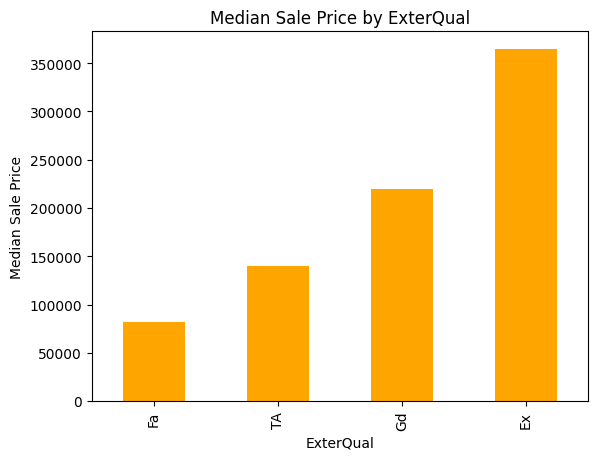

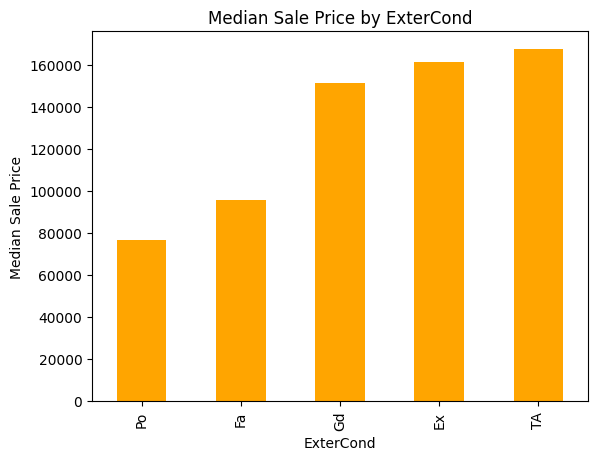

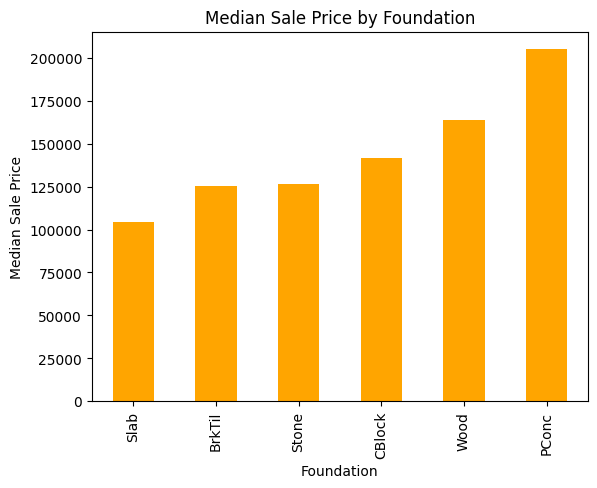

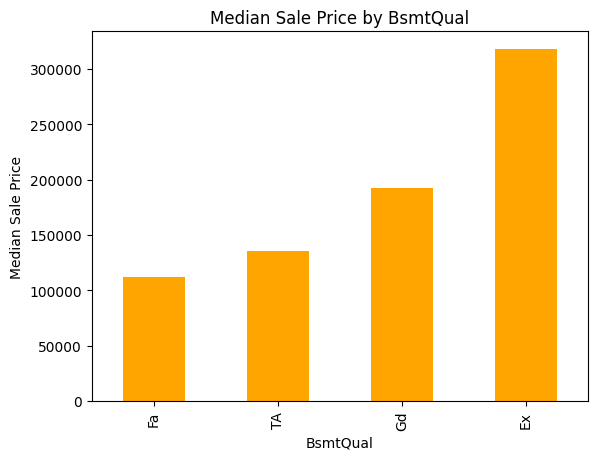

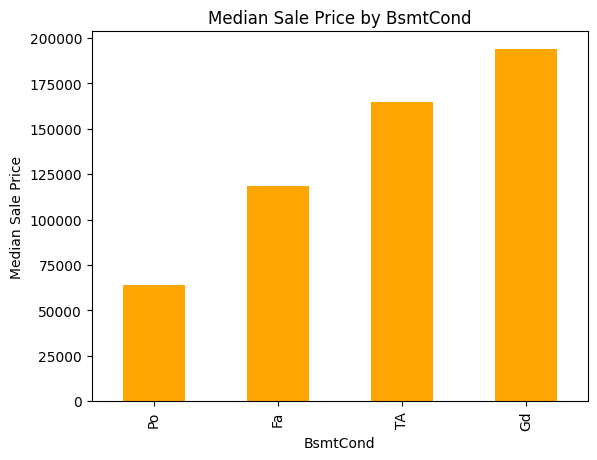

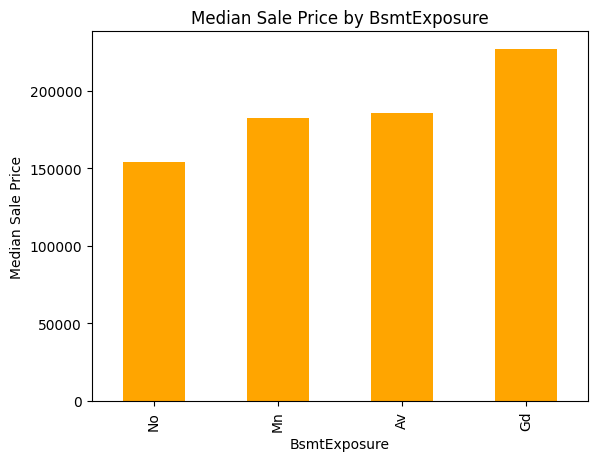

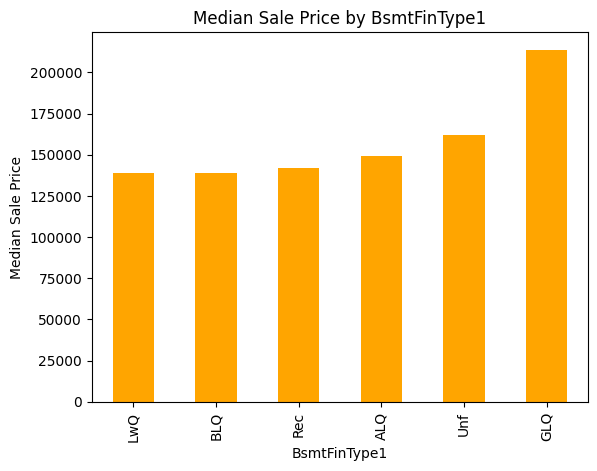

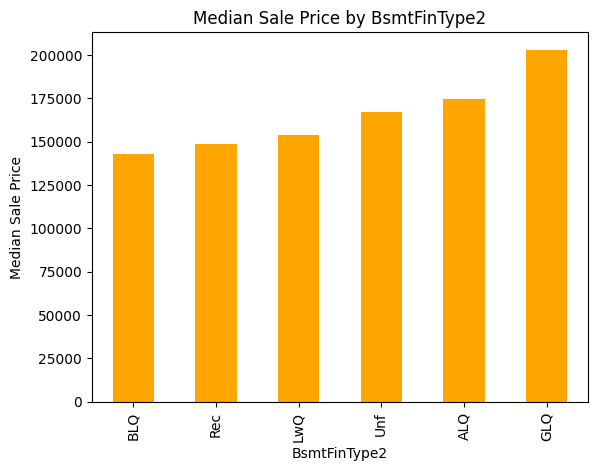

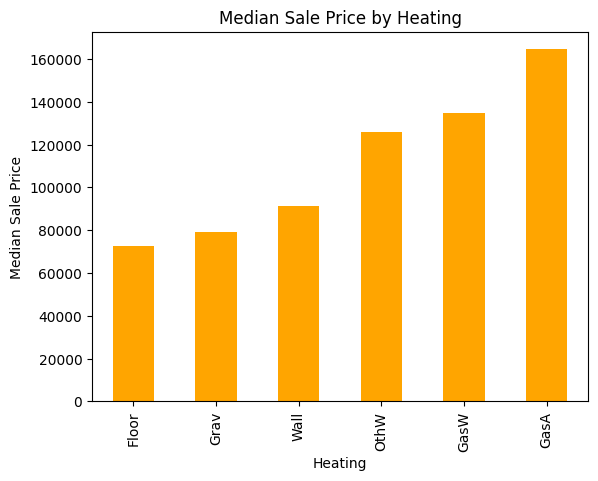

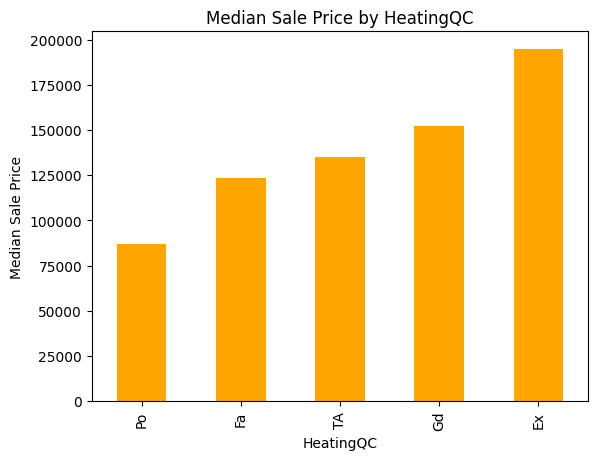

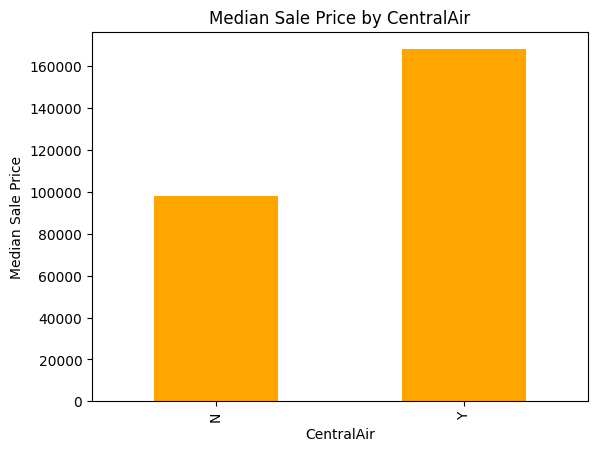

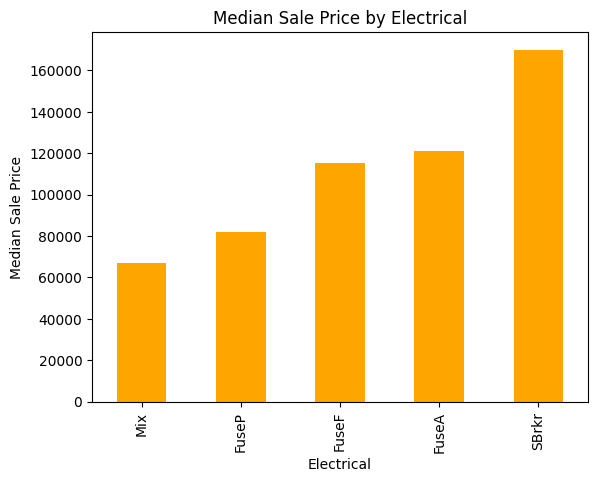

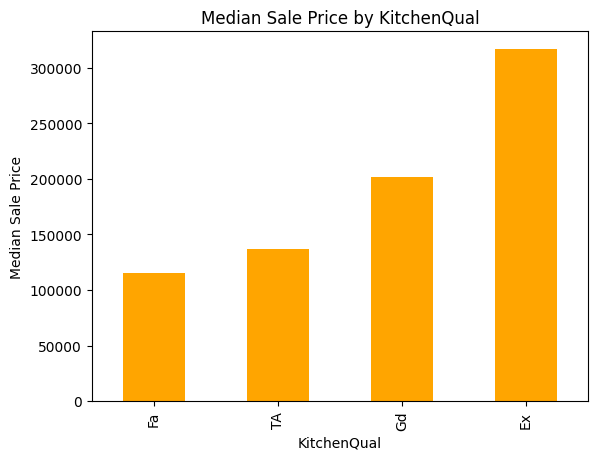

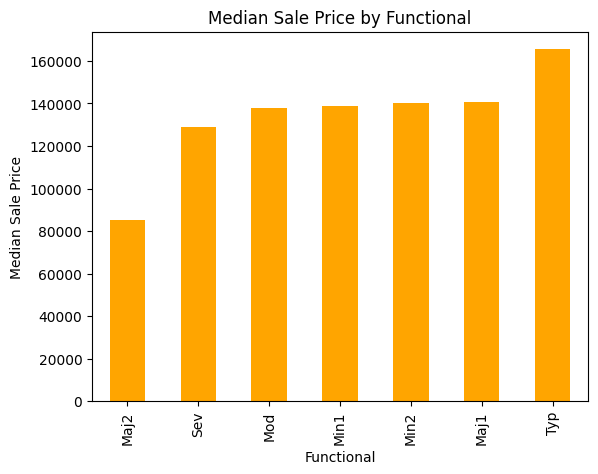

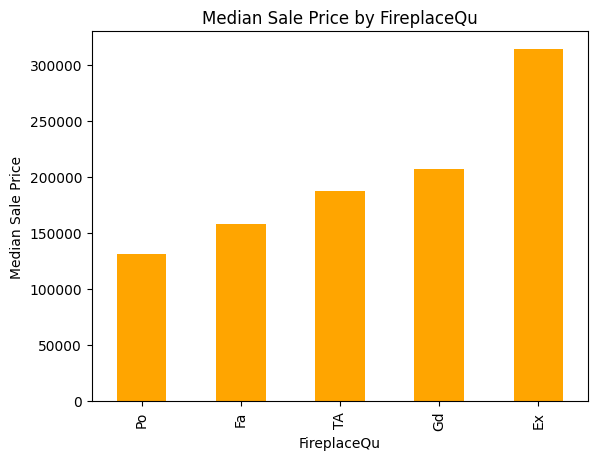

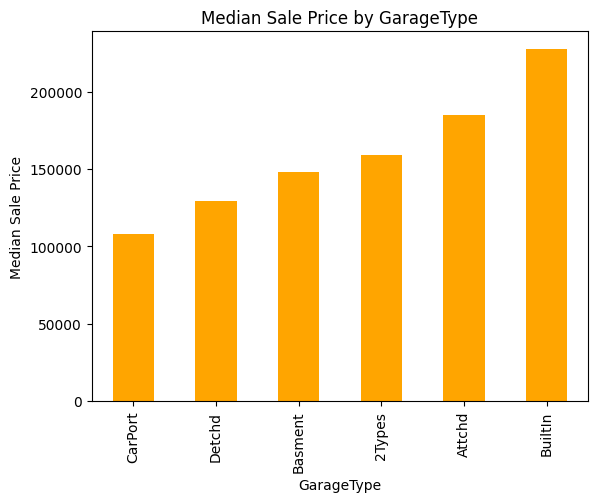

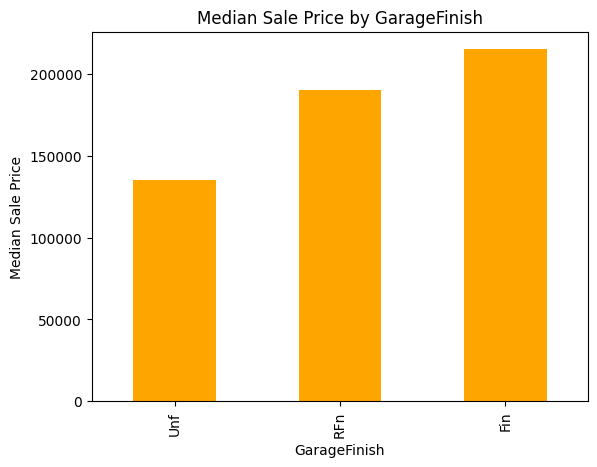

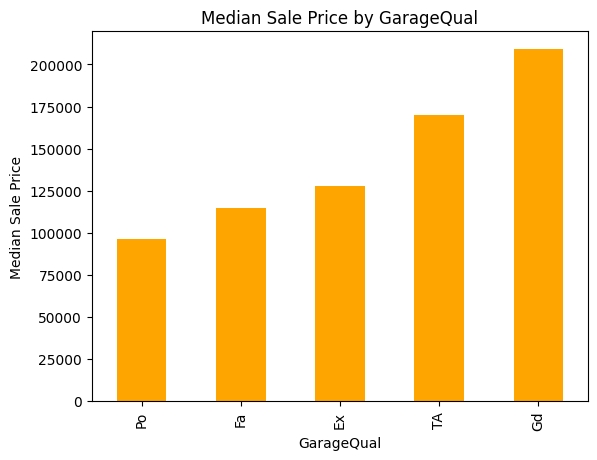

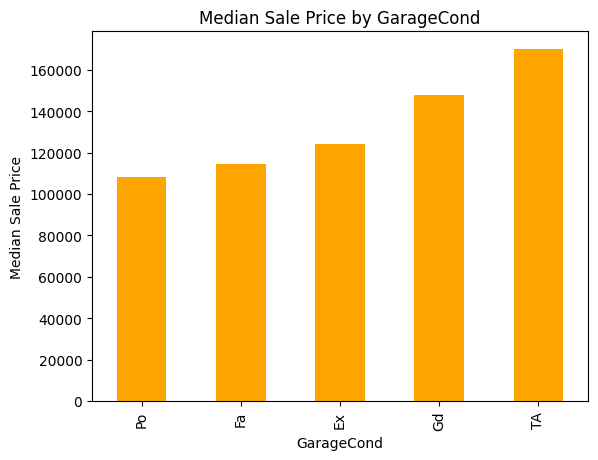

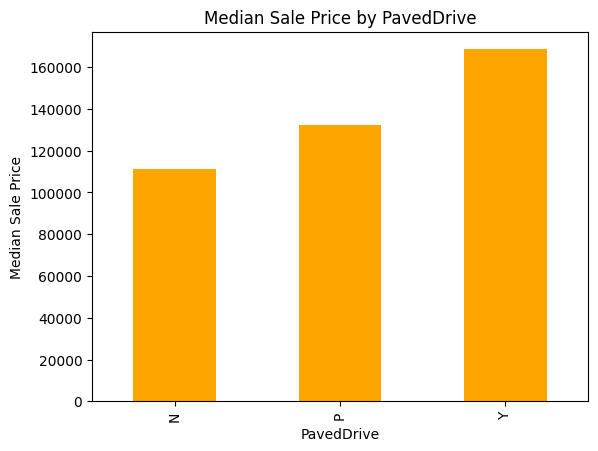

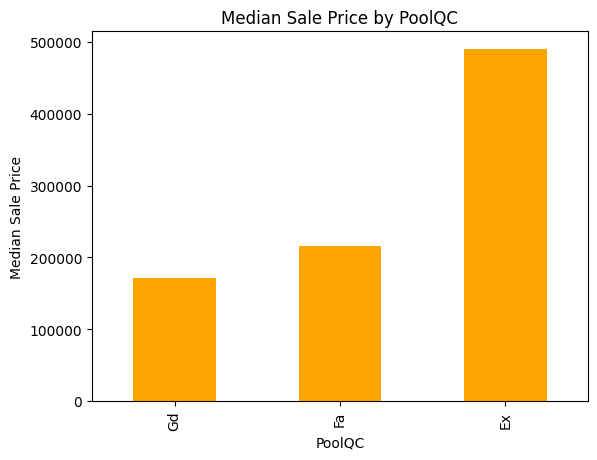

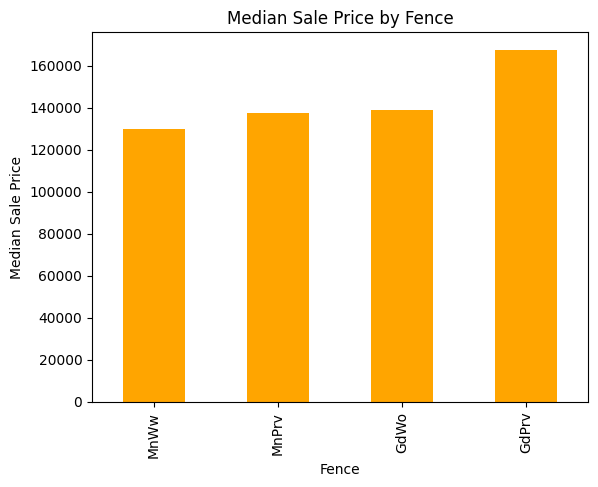

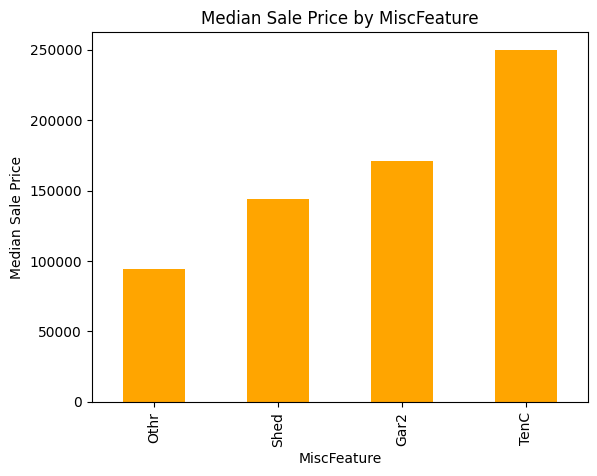

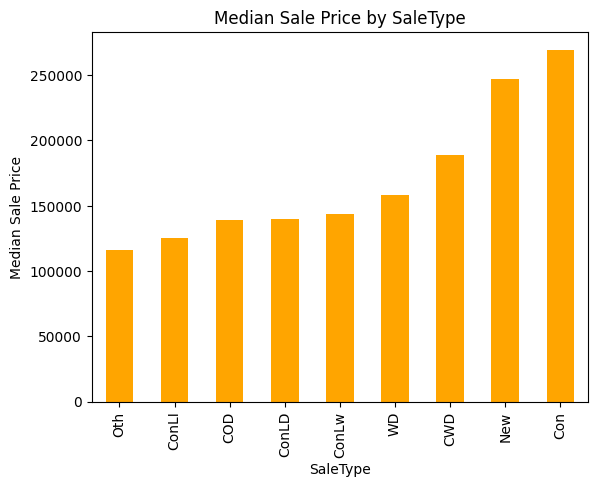

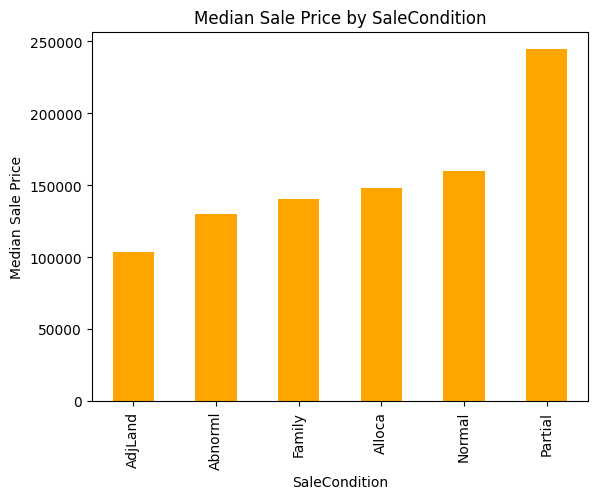

In [122]:
for column in traindf.select_dtypes(include='object').columns:
  data_to_plot = traindf.groupby(column)['SalePrice'].median().sort_values()
  data_to_plot.plot(kind='bar', color='orange')
  plt.xlabel(column)
  plt.ylabel('Median Sale Price')
  plt.title(f'Median Sale Price by {column}')
  plt.show()

<ipython-input-123-471801c19ca3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf["YrsOld"])


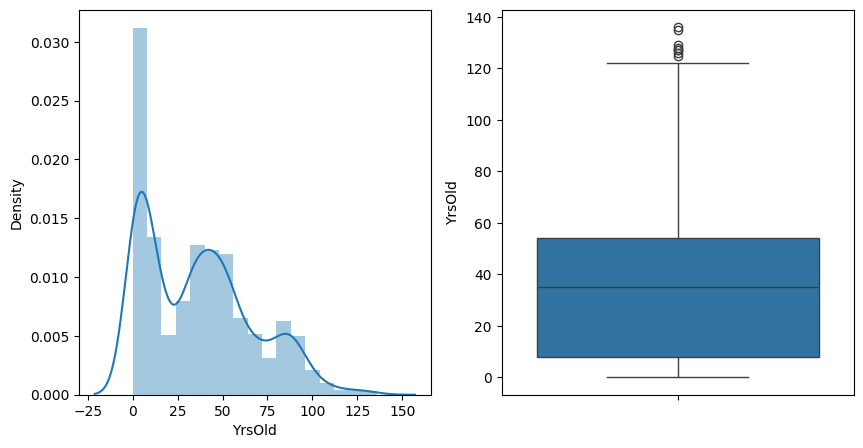

In [123]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(traindf["YrsOld"])

plt.subplot(1,2,2)
sns.boxplot(traindf["YrsOld"])

plt.show()

<Axes: xlabel='YrSold'>

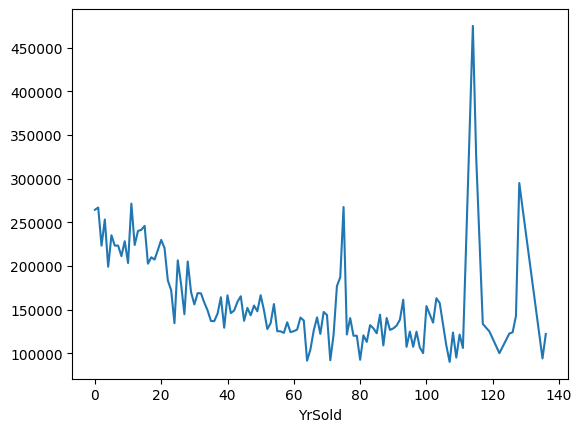

In [124]:
traindf.groupby('YrSold')['SalePrice'].mean().plot()

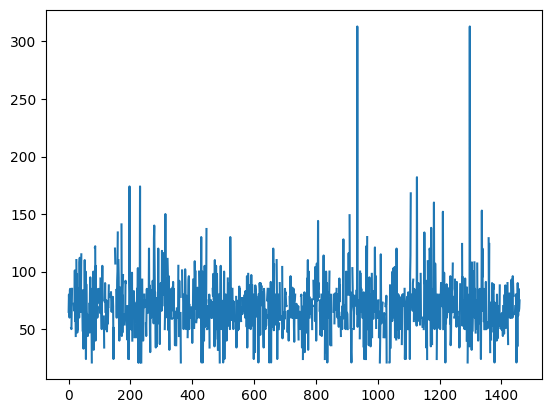

In [125]:
plt.plot(range(1460), traindf['LotFrontage'])

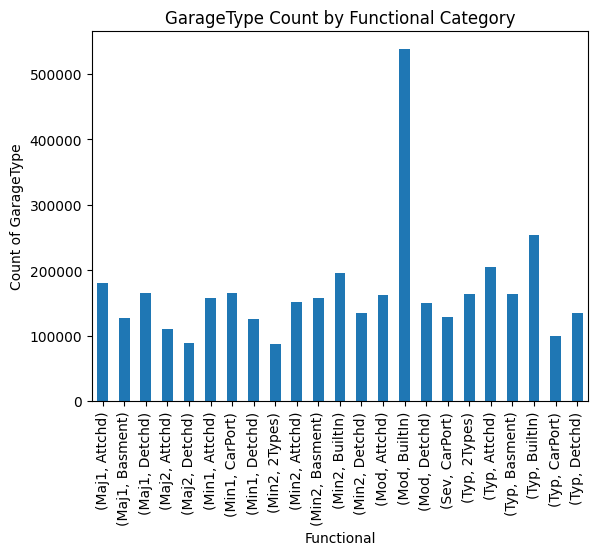

In [126]:
traindf.groupby(['Functional', 'GarageType'])["SalePrice"].mean().plot(kind='bar')
plt.xlabel('Functional')
plt.ylabel('Count of GarageType')
plt.title('GarageType Count by Functional Category')
plt.show()

##Handling numeric data

In [127]:
traindf[numeric_features].isna().sum()

MSSubClass          0
LotFrontage       259
LotArea             0
OverallQual         0
OverallCond         0
YearRemodAdd        0
MasVnrArea          8
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt        81
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice           0
YrsOld              0
TotalBathroom       0
TotalPorchArea      0
dtype: int64

In [128]:
traindf["LotFrontage"] = traindf.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
traindf['MasVnrArea']=traindf['MasVnrArea'].fillna(0)
for column in numeric_features:
  if traindf[column].isna().sum()>10:
    traindf[column].fillna(0, inplace=True)
  if traindf[column].isna().sum() < 10:
    traindf[column]=traindf[column].fillna(traindf[column].mode())

In [129]:
traindf[numeric_features].isna().sum()

MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
OverallCond       0
YearRemodAdd      0
MasVnrArea        0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt       0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
YrsOld            0
TotalBathroom     0
TotalPorchArea    0
dtype: int64

In [130]:
traindf.shape

(1460, 82)

In [131]:
traindf.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub    Inside  ...         NaN       0      2      5   
1         Lvl    AllPub       FR2  ...         NaN       0      5     31   
2         Lvl    AllPub    Inside  ...         NaN       0      9      7   
3         Lvl    AllPub    Corner  ...         NaN       0      2     91   
4         Lvl    AllPub       FR2  ...         NaN       0     12      8   

  SaleType SaleCondition  SalePrice  YrsOld  TotalBathroom TotalPorchArea  
0       WD        Normal     208500       5            3.5             61  
1       WD        Normal     181500      31            2.5              0  
2       WD        Normal     223500       7            3.5             42  
3       WD       Abnorml     140000      91            2.0            307  
4       WD        Normal     250000       8            3.5             84  

[5 rows x 82 columns]

##Handling categorical data

In [132]:
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [133]:
traindf[categorical_features]

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
0         CollgCr       Norm  ...     Attchd          RFn         TA   
1         Veenker      Feedr  ...     Attchd          RFn         TA   
2         CollgCr       Norm  ...     Attchd          RFn         TA   
3         Crawfor       Norm  ...     Detchd          Unf         TA   
4         NoRidge       Norm  ...     Attchd          RFn         TA   
...           ...        ...  ...        ...          ...        ...   
1455      Gilbert       Norm  ...     Attchd          RFn         TA   
1456       NWAmes       Norm  ...     Attchd          Unf         TA   
1457      Crawfor       Norm  ...     Attchd          RFn         TA   
1458        NAmes       Norm  ...     Attchd          Unf         TA   
1459      Edwards       Norm  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y    NaN    NaN         NaN       WD        Normal  
1            TA          Y    NaN    NaN         NaN       WD        Normal  
2            TA          Y    NaN    NaN         NaN       WD        Normal  
3            TA          Y    NaN    NaN         NaN       WD       Abnorml  
4            TA          Y    NaN    NaN         NaN       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1455         TA          Y    NaN    NaN         NaN       WD        Normal  
1456         TA          Y    NaN  MnPrv         NaN       WD        Normal  
1457         TA          Y    NaN  GdPrv        Shed       WD        Normal  
1458         TA          Y    NaN    NaN         NaN       WD        Normal  
1459         TA          Y    NaN    NaN         NaN       WD        Normal  

[1460 rows x 43 columns]

In [134]:
for column in categorical_features:
  if traindf[column].isna().sum()>10:
    traindf[column].fillna("Miss", inplace=True)
  if traindf[column].isna().sum()<10:
    print(column)
    traindf[column]=traindf[column].fillna(traindf[column].mode())

traindf['Electrical']=traindf['Electrical'].fillna('SBrkr')

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [135]:
traindf['Electrical'].isna().sum()

0

In [136]:
BigData=traindf.copy()
BigData

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave  Miss      Reg   
1             20       RL         80.0     9600   Pave  Miss      Reg   
2             60       RL         68.0    11250   Pave  Miss      IR1   
3             70       RL         60.0     9550   Pave  Miss      IR1   
4             60       RL         84.0    14260   Pave  Miss      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave  Miss      Reg   
1456          20       RL         85.0    13175   Pave  Miss      Reg   
1457          70       RL         66.0     9042   Pave  Miss      Reg   
1458          20       RL         68.0     9717   Pave  Miss      Reg   
1459          20       RL         75.0     9937   Pave  Miss      Reg   

     LandContour Utilities LotConfig  ... MiscFeature MiscVal MoSold YrSold  \
0            Lvl    AllPub    Inside  ...        Miss       0      2      5   
1            Lvl    AllPub       FR2  ...        Miss       0      5     31   
2            Lvl    AllPub    Inside  ...        Miss       0      9      7   
3            Lvl    AllPub    Corner  ...        Miss       0      2     91   
4            Lvl    AllPub       FR2  ...        Miss       0     12      8   
...          ...       ...       ...  ...         ...     ...    ...    ...   
1455         Lvl    AllPub    Inside  ...        Miss       0      8      8   
1456         Lvl    AllPub    Inside  ...        Miss       0      2     32   
1457         Lvl    AllPub    Inside  ...        Shed    2500      5     69   
1458         Lvl    AllPub    Inside  ...        Miss       0      4     60   
1459         Lvl    AllPub    Inside  ...        Miss       0      6     43   

     SaleType SaleCondition  SalePrice  YrsOld  TotalBathroom TotalPorchArea  
0          WD        Normal     208500       5            3.5             61  
1          WD        Normal     181500      31            2.5              0  
2          WD        Normal     223500       7            3.5             42  
3          WD       Abnorml     140000      91            2.0            307  
4          WD        Normal     250000       8            3.5             84  
...       ...           ...        ...     ...            ...            ...  
1455       WD        Normal     175000       8            2.5             40  
1456       WD        Normal     210000      32            3.0              0  
1457       WD        Normal     266500      69            2.0             60  
1458       WD        Normal     142125      60            2.0            112  
1459       WD        Normal     147500      43            2.5             68  

[1460 rows x 82 columns]

In [137]:
OrdinalOrder = [['Miss','ELO','NoSeWa','NoSewr','AllPub'],['Miss','IR3','IR2','IR1','Reg'],['Miss','Sev','Mod','Gtl'],['Miss','Po', 'Fa', 'TA', 'Gd', 'Ex'],['Miss','No','Mn','Av','Gd'],['Miss','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],['Miss','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],['Miss','Unf','RFn','Fin'],['Miss','N','P','Y'],['Miss', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv',],['Miss','Grvl','Pave']]
Columns = [['Utilities'],['LotShape'], ['LandSlope'],['ExterCond', 'HeatingQC', 'GarageQual','GarageCond','FireplaceQu','ExterQual', 'BsmtQual', 'KitchenQual','BsmtCond','PoolQC'],['BsmtExposure'],['BsmtFinType1', 'BsmtFinType2'],['Functional'],['GarageFinish'],['PavedDrive'],['Fence'],['Alley','Street']]
for order, columns in zip(OrdinalOrder, Columns):
    OE = OrdinalEncoder(categories=[order],dtype='int64')
    for column in columns:
        TransformedData = OE.fit_transform(BigData[[column]])
        BigData[column] = TransformedData

In [138]:
BigData[categorical_features]

MSZoning  Street  Alley  LotShape LandContour  Utilities LotConfig  \
0          RL       2      0         4         Lvl          4    Inside   
1          RL       2      0         4         Lvl          4       FR2   
2          RL       2      0         3         Lvl          4    Inside   
3          RL       2      0         3         Lvl          4    Corner   
4          RL       2      0         3         Lvl          4       FR2   
...       ...     ...    ...       ...         ...        ...       ...   
1455       RL       2      0         4         Lvl          4    Inside   
1456       RL       2      0         4         Lvl          4    Inside   
1457       RL       2      0         4         Lvl          4    Inside   
1458       RL       2      0         4         Lvl          4    Inside   
1459       RL       2      0         4         Lvl          4    Inside   

      LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
0             3      CollgCr       Norm  ...     Attchd            2   
1             3      Veenker      Feedr  ...     Attchd            2   
2             3      CollgCr       Norm  ...     Attchd            2   
3             3      Crawfor       Norm  ...     Detchd            1   
4             3      NoRidge       Norm  ...     Attchd            2   
...         ...          ...        ...  ...        ...          ...   
1455          3      Gilbert       Norm  ...     Attchd            2   
1456          3       NWAmes       Norm  ...     Attchd            1   
1457          3      Crawfor       Norm  ...     Attchd            2   
1458          3        NAmes       Norm  ...     Attchd            1   
1459          3      Edwards       Norm  ...     Attchd            3   

     GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  SaleType  \
0             3          3          3      0     0        Miss        WD   
1             3          3          3      0     0        Miss        WD   
2             3          3          3      0     0        Miss        WD   
3             3          3          3      0     0        Miss        WD   
4             3          3          3      0     0        Miss        WD   
...         ...        ...        ...    ...   ...         ...       ...   
1455          3          3          3      0     0        Miss        WD   
1456          3          3          3      0     3        Miss        WD   
1457          3          3          3      0     4        Shed        WD   
1458          3          3          3      0     0        Miss        WD   
1459          3          3          3      0     0        Miss        WD   

      SaleCondition  
0            Normal  
1            Normal  
2            Normal  
3           Abnorml  
4            Normal  
...             ...  
1455         Normal  
1456         Normal  
1457         Normal  
1458         Normal  
1459         Normal  

[1460 rows x 43 columns]

In [139]:
Columns2=['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition','MiscFeature','MasVnrType']
OHE=OneHotEncoder(handle_unknown='ignore', sparse_output=False,dtype='int64').set_output(transform='pandas')
for column in Columns2:
  OHEtransform=OHE.fit_transform(BigData[[column]])
  BigData=pd.concat([BigData,OHEtransform], axis=1).drop(columns=column)

In [140]:
BigData

MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  Utilities  \
0             60         65.0     8450       2      0         4          4   
1             20         80.0     9600       2      0         4          4   
2             60         68.0    11250       2      0         3          4   
3             70         60.0     9550       2      0         3          4   
4             60         84.0    14260       2      0         3          4   
...          ...          ...      ...     ...    ...       ...        ...   
1455          60         62.0     7917       2      0         4          4   
1456          20         85.0    13175       2      0         4          4   
1457          70         66.0     9042       2      0         4          4   
1458          20         68.0     9717       2      0         4          4   
1459          20         75.0     9937       2      0         4          4   

      LandSlope  OverallQual  OverallCond  ...  SaleCondition_Partial  \
0             3            7            5  ...                      0   
1             3            6            8  ...                      0   
2             3            7            5  ...                      0   
3             3            7            5  ...                      0   
4             3            8            5  ...                      0   
...         ...          ...          ...  ...                    ...   
1455          3            6            5  ...                      0   
1456          3            6            6  ...                      0   
1457          3            7            9  ...                      0   
1458          3            5            6  ...                      0   
1459          3            5            6  ...                      0   

      MiscFeature_Gar2  MiscFeature_Miss  MiscFeature_Othr  MiscFeature_Shed  \
0                    0                 1                 0                 0   
1                    0                 1                 0                 0   
2                    0                 1                 0                 0   
3                    0                 1                 0                 0   
4                    0                 1                 0                 0   
...                ...               ...               ...               ...   
1455                 0                 1                 0                 0   
1456                 0                 1                 0                 0   
1457                 0                 0                 0                 1   
1458                 0                 1                 0                 0   
1459                 0                 1                 0                 0   

      MiscFeature_TenC  MasVnrType_BrkCmn  MasVnrType_BrkFace  \
0                    0                  0                   1   
1                    0                  0                   0   
2                    0                  0                   1   
3                    0                  0                   0   
4                    0                  0                   1   
...                ...                ...                 ...   
1455                 0                  0                   0   
1456                 0                  0                   0   
1457                 0                  0                   0   
1458                 0                  0                   0   
1459                 0                  0                   0   

      MasVnrType_Miss  MasVnrType_Stone  
0                   0                 0  
1                   1                 0  
2                   0                 0  
3                   1                 0  
4                   0                 0  
...               ...               ...  
1455                1                 0  
1456                0                 1  
1457                1                 0  
1458                1         

In [141]:
LE=LabelEncoder()
LEtransform=LE.fit_transform(BigData['CentralAir'])
BigData['CentralAir']=LEtransform
BigData.head()

MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  Utilities  \
0          60         65.0     8450       2      0         4          4   
1          20         80.0     9600       2      0         4          4   
2          60         68.0    11250       2      0         3          4   
3          70         60.0     9550       2      0         3          4   
4          60         84.0    14260       2      0         3          4   

   LandSlope  OverallQual  OverallCond  ...  SaleCondition_Partial  \
0          3            7            5  ...                      0   
1          3            6            8  ...                      0   
2          3            7            5  ...                      0   
3          3            7            5  ...                      0   
4          3            8            5  ...                      0   

   MiscFeature_Gar2  MiscFeature_Miss  MiscFeature_Othr  MiscFeature_Shed  \
0                 0                 1                 0                 0   
1                 0                 1                 0                 0   
2                 0                 1                 0                 0   
3                 0                 1                 0                 0   
4                 0                 1                 0                 0   

   MiscFeature_TenC  MasVnrType_BrkCmn  MasVnrType_BrkFace  MasVnrType_Miss  \
0                 0                  0                   1                0   
1                 0                  0                   0                1   
2                 0                  0                   1                0   
3                 0                  0                   0                1   
4                 0                  0                   1                0   

   MasVnrType_Stone  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 224 columns]

In [142]:
ScaledData=BigData.copy()

In [143]:
ScaledData

MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  Utilities  \
0             60         65.0     8450       2      0         4          4   
1             20         80.0     9600       2      0         4          4   
2             60         68.0    11250       2      0         3          4   
3             70         60.0     9550       2      0         3          4   
4             60         84.0    14260       2      0         3          4   
...          ...          ...      ...     ...    ...       ...        ...   
1455          60         62.0     7917       2      0         4          4   
1456          20         85.0    13175       2      0         4          4   
1457          70         66.0     9042       2      0         4          4   
1458          20         68.0     9717       2      0         4          4   
1459          20         75.0     9937       2      0         4          4   

      LandSlope  OverallQual  OverallCond  ...  SaleCondition_Partial  \
0             3            7            5  ...                      0   
1             3            6            8  ...                      0   
2             3            7            5  ...                      0   
3             3            7            5  ...                      0   
4             3            8            5  ...                      0   
...         ...          ...          ...  ...                    ...   
1455          3            6            5  ...                      0   
1456          3            6            6  ...                      0   
1457          3            7            9  ...                      0   
1458          3            5            6  ...                      0   
1459          3            5            6  ...                      0   

      MiscFeature_Gar2  MiscFeature_Miss  MiscFeature_Othr  MiscFeature_Shed  \
0                    0                 1                 0                 0   
1                    0                 1                 0                 0   
2                    0                 1                 0                 0   
3                    0                 1                 0                 0   
4                    0                 1                 0                 0   
...                ...               ...               ...               ...   
1455                 0                 1                 0                 0   
1456                 0                 1                 0                 0   
1457                 0                 0                 0                 1   
1458                 0                 1                 0                 0   
1459                 0                 1                 0                 0   

      MiscFeature_TenC  MasVnrType_BrkCmn  MasVnrType_BrkFace  \
0                    0                  0                   1   
1                    0                  0                   0   
2                    0                  0                   1   
3                    0                  0                   0   
4                    0                  0                   1   
...                ...                ...                 ...   
1455                 0                  0                   0   
1456                 0                  0                   0   
1457                 0                  0                   0   
1458                 0                  0                   0   
1459                 0                  0                   0   

      MasVnrType_Miss  MasVnrType_Stone  
0                   0                 0  
1                   1                 0  
2                   0                 0  
3                   1                 0  
4                   0                 0  
...               ...               ...  
1455                1                 0  
1456                0                 1  
1457                1                 0  
1458                1         

In [144]:
TransformData=StandardScaler().fit_transform(ScaledData)
ScaledData=pd.DataFrame(TransformData,columns=ScaledData.columns)
ScaledData.head()

MSSubClass  LotFrontage   LotArea    Street     Alley  LotShape  Utilities  \
0    0.073375    -0.231877 -0.207142  0.064238 -0.243025  0.701291    0.02618   
1   -0.872563     0.437043 -0.091886  0.064238 -0.243025  0.701291    0.02618   
2    0.073375    -0.098093  0.073480  0.064238 -0.243025 -1.016637    0.02618   
3    0.309859    -0.454850 -0.096897  0.064238 -0.243025 -1.016637    0.02618   
4    0.073375     0.615421  0.375148  0.064238 -0.243025 -1.016637    0.02618   

   LandSlope  OverallQual  OverallCond  ...  SaleCondition_Partial  \
0   0.225716     0.651479    -0.517200  ...              -0.305995   
1   0.225716    -0.071836     2.179628  ...              -0.305995   
2   0.225716     0.651479    -0.517200  ...              -0.305995   
3   0.225716     0.651479    -0.517200  ...              -0.305995   
4   0.225716     1.374795    -0.517200  ...              -0.305995   

   MiscFeature_Gar2  MiscFeature_Miss  MiscFeature_Othr  MiscFeature_Shed  \
0         -0.037037          0.195977         -0.037037         -0.186352   
1         -0.037037          0.195977         -0.037037         -0.186352   
2         -0.037037          0.195977         -0.037037         -0.186352   
3         -0.037037          0.195977         -0.037037         -0.186352   
4         -0.037037          0.195977         -0.037037         -0.186352   

   MiscFeature_TenC  MasVnrType_BrkCmn  MasVnrType_BrkFace  MasVnrType_Miss  \
0          -0.02618          -0.101885            1.510265        -1.217782   
1          -0.02618          -0.101885           -0.662136         0.821165   
2          -0.02618          -0.101885            1.510265        -1.217782   
3          -0.02618          -0.101885           -0.662136         0.821165   
4          -0.02618          -0.101885            1.510265        -1.217782   

   MasVnrType_Stone  
0         -0.309994  
1         -0.309994  
2         -0.309994  
3         -0.309994  
4         -0.309994  

[5 rows x 224 columns]

In [145]:
df_train=ScaledData.copy()

In [146]:
df_train

MSSubClass  LotFrontage   LotArea    Street     Alley  LotShape  \
0       0.073375    -0.231877 -0.207142  0.064238 -0.243025  0.701291   
1      -0.872563     0.437043 -0.091886  0.064238 -0.243025  0.701291   
2       0.073375    -0.098093  0.073480  0.064238 -0.243025 -1.016637   
3       0.309859    -0.454850 -0.096897  0.064238 -0.243025 -1.016637   
4       0.073375     0.615421  0.375148  0.064238 -0.243025 -1.016637   
...          ...          ...       ...       ...       ...       ...   
1455    0.073375    -0.365661 -0.260560  0.064238 -0.243025  0.701291   
1456   -0.872563     0.660016  0.266407  0.064238 -0.243025  0.701291   
1457    0.309859    -0.187282 -0.147810  0.064238 -0.243025  0.701291   
1458   -0.872563    -0.098093 -0.080160  0.064238 -0.243025  0.701291   
1459   -0.872563     0.214070 -0.058112  0.064238 -0.243025  0.701291   

      Utilities  LandSlope  OverallQual  OverallCond  ...  \
0       0.02618   0.225716     0.651479    -0.517200  ...   
1       0.02618   0.225716    -0.071836     2.179628  ...   
2       0.02618   0.225716     0.651479    -0.517200  ...   
3       0.02618   0.225716     0.651479    -0.517200  ...   
4       0.02618   0.225716     1.374795    -0.517200  ...   
...         ...        ...          ...          ...  ...   
1455    0.02618   0.225716    -0.071836    -0.517200  ...   
1456    0.02618   0.225716    -0.071836     0.381743  ...   
1457    0.02618   0.225716     0.651479     3.078570  ...   
1458    0.02618   0.225716    -0.795151     0.381743  ...   
1459    0.02618   0.225716    -0.795151     0.381743  ...   

      SaleCondition_Partial  MiscFeature_Gar2  MiscFeature_Miss  \
0                 -0.305995         -0.037037          0.195977   
1                 -0.305995         -0.037037          0.195977   
2                 -0.305995         -0.037037          0.195977   
3                 -0.305995         -0.037037          0.195977   
4                 -0.305995         -0.037037          0.195977   
...                     ...               ...               ...   
1455              -0.305995         -0.037037          0.195977   
1456              -0.305995         -0.037037          0.195977   
1457              -0.305995         -0.037037         -5.102650   
1458              -0.305995         -0.037037          0.195977   
1459              -0.305995         -0.037037          0.195977   

      MiscFeature_Othr  MiscFeature_Shed  MiscFeature_TenC  MasVnrType_BrkCmn  \
0            -0.037037         -0.186352          -0.02618          -0.101885   
1            -0.037037         -0.186352          -0.02618          -0.101885   
2            -0.037037         -0.186352          -0.02618          -0.101885   
3            -0.037037         -0.186352          -0.02618          -0.101885   
4            -0.037037         -0.186352          -0.02618          -0.101885   
...                ...               ...               ...                ...   
1455         -0.037037         -0.186352          -0.02618          -0.101885   
1456         -0.037037         -0.186352          -0.02618          -0.101885   
1457         -0.037037          5.366183          -0.02618          -0.101885   
1458         -0.037037         -0.186352          -0.02618          -0.101885   
1459         -0.037037         -0.186352          -0.02618          -0.101885   

      MasVnrType_BrkFace  MasVnrType_Miss  MasVnrType_Stone  
0               1.510265        -1.217782         -0.309994  
1              -0.662136         0.821165         -0.309994  
2               1.510265        -1.217782         -0.309994  
3              -0.662136         0.821165         -0.309994  
4               1.510265        -1.217782         -0.309994  
...                  ...              ...               ...  
1455           -0.662136         0.821165         -0.309994  
1456           -0.662136        -1.217782          3.225872  
1457           -0.662136         0.821165         -0.309994 

In [147]:
df_train=df_train.drop(columns='SalePrice')
Y_train=traindf[["SalePrice"]]
Y_train

SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1455     175000
1456     210000
1457     266500
1458     142125
1459     147500

[1460 rows x 1 columns]

In [156]:
X_train,X_test,y_train,y_test = train_test_split(df_train,Y_train,test_size=0.3,random_state=75)

In [157]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Making dictionary of linear models

In [160]:
models = {
    'LinearRegression':LinearRegression(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    'RandomForestRegressor':RandomForestRegressor(),
    'GradientBoostingRegressor' :GradientBoostingRegressor(),
    'ElasticNet':ElasticNet()
}

#Taking results from the models

In [161]:
model_results = []
model_names = []
for name,model in models.items():
    a = model.fit(X_train,y_train['SalePrice'])
    predicted = a.predict(X_test)
    score=a.score(X_test,y_test)
    model_results.append(score)
    model_names.append(name)
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'R^2'}).sort_values(by='R^2',ascending=False)

print(df_results)

                       Model                          R^2
7  GradientBoostingRegressor                     0.904355
4               XGBRegressor                     0.900494
6      RandomForestRegressor                      0.87882
8                 ElasticNet                     0.748184
2              BayesianRidge                     0.685802
5                      Ridge                     0.642801
3                        SVR                    -0.036811
1               SGDRegressor                -24411.489828
0           LinearRegression -1500522849296552028012544.0


In [162]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train['SalePrice'])

GradientBoostingRegressor()

In [163]:
predicted=GBR.predict(X_test)

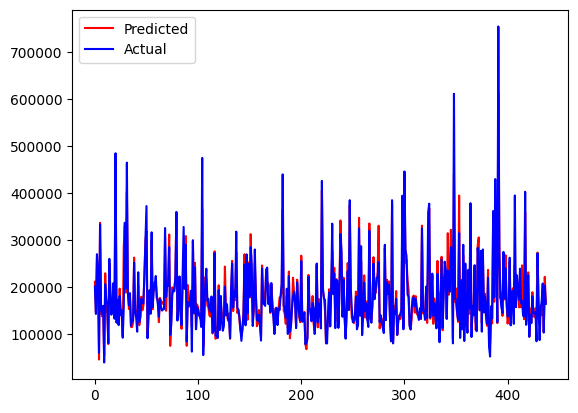

In [164]:
plt.plot(range(len(predicted)), predicted,color='red')
plt.plot(range(len(predicted)), y_test,color='blue')
plt.legend(['Predicted','Actual'])
plt.show()